In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
original_data = pd.read_csv('/content/drive/Shareddrives/MATH 2327 3439 - Data/data/free_throws.csv')

In [50]:
original_data.head()

,period,player,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,season_start,shot_count
0,1,Andrew Bynum,0,1,LAL,PHX,1,0,114,106,47.000000,2006,1
1,1,Andrew Bynum,0,1,LAL,PHX,2,0,114,106,47.000000,2006,2
2,1,Andrew Bynum,0,1,LAL,PHX,12,18,114,106,29.733333,2006,1
3,1,Andrew Bynum,0,0,LAL,PHX,12,18,114,106,29.733333,2006,2
4,1,Shawn Marion,0,1,LAL,PHX,12,21,114,106,29.200000,2006,1


Find all the N/A values in the data per column

In [51]:
original_data.isna().sum()

,0
period,0
player,0
playoffs,0
shot_made,0
home_team,0
visit_team,0
home_score,0
visit_score,0
home_final_score,0
visit_final_score,0


Does X's player free throw performance correlate to his team making the playoffs?

In [52]:
# Total shots taken
original_data['shot_made'].shape

(618019,)

The following 2 blocks of code allow you to get the conversion rate for any list of players based on their shots made. So you can look at the top 5, 10 or 40.

EXAMPLE

get_last_five_min_data('LeBron James', 1)

Returns: LeBron James: 0.770

# **This section will be used to cover overall team stats.**

## What are each teams' min., max., median, and average amount of **shots**
This also looks at each teams highest number of shots made per game type

In [53]:
import pandas as pd

teams = pd.concat([original_data['home_team'], original_data['visit_team']]).unique()

# Initialize dictionaries to store results
team_scores = {}
team_highest_scores_by_game_type = {}

# Calculate the min, max, mean, and median scores for each team
for team in teams:
    # Filter scores for games where the team is the home or visiting team
    home_scores = original_data[original_data['home_team'] == team]['home_final_score']
    visit_scores = original_data[original_data['visit_team'] == team]['visit_final_score']
    all_scores = pd.concat([home_scores, visit_scores])

    team_scores[team] = {
        'min_score': all_scores.min(),
        'max_score': all_scores.max(),
        'mean_score': all_scores.mean(),
        'median_score': all_scores.median()
    }

    # Calculate highest scores by game type
    highest_home_score = home_scores.max() if not home_scores.empty else 0
    highest_visitor_score = visit_scores.max() if not visit_scores.empty else 0
    playoff_games = original_data[
        ((original_data['home_team'] == team) & (original_data['playoffs'] == 1))
        | ((original_data['visit_team'] == team) & (original_data['playoffs'] == 1))
    ]
    highest_playoff_score = max(
        playoff_games['home_final_score'].max(), playoff_games['visit_final_score'].max()
    ) if not playoff_games.empty else 0

    team_highest_scores_by_game_type[team] = {
        'highest_home_score': highest_home_score,
        'highest_visitor_score': highest_visitor_score,
        'highest_playoff_score': highest_playoff_score
    }

# Display the results for scores
for team, stats in team_scores.items():
    print(f"Stats for {team}:")
    for stat, value in stats.items():
        print(f"  {stat}: {value}")
    print()

# Display the highest scores by game type
for team, game_type_scores in team_highest_scores_by_game_type.items():
    print(f"Highest scores for {team} by game type:")
    for game_type, score in game_type_scores.items():
        print(f"  {game_type}: {score}")
    print()


Stats for LAL:
  min_score: 72
  max_score: 141
  mean_score: 102.71643841890716
  median_score: 103.0

Stats for MIA:
  min_score: 54
  max_score: 141
  mean_score: 98.58306039715077
  median_score: 98.0

Stats for BOS:
  min_score: 67
  max_score: 139
  mean_score: 98.86761527377521
  median_score: 98.0

Stats for CLE:
  min_score: 57
  max_score: 132
  mean_score: 99.30628302721325
  median_score: 99.0

Stats for DET:
  min_score: 64
  max_score: 147
  mean_score: 97.35258016032064
  median_score: 97.0

Stats for GS:
  min_score: 72
  max_score: 146
  mean_score: 107.8107497947642
  median_score: 108.0

Stats for MIN:
  min_score: 65
  max_score: 144
  mean_score: 99.94252843712668
  median_score: 99.0

Stats for NJ:
  min_score: 67
  max_score: 157
  mean_score: 95.92407835503103
  median_score: 95.0

Stats for ORL:
  min_score: 56
  max_score: 139
  mean_score: 99.05016224656599
  median_score: 99.0

Stats for PHI:
  min_score: 67
  max_score: 141
  mean_score: 96.64436055230904
 

### Team Scores Graphed (min, max, med, mean)




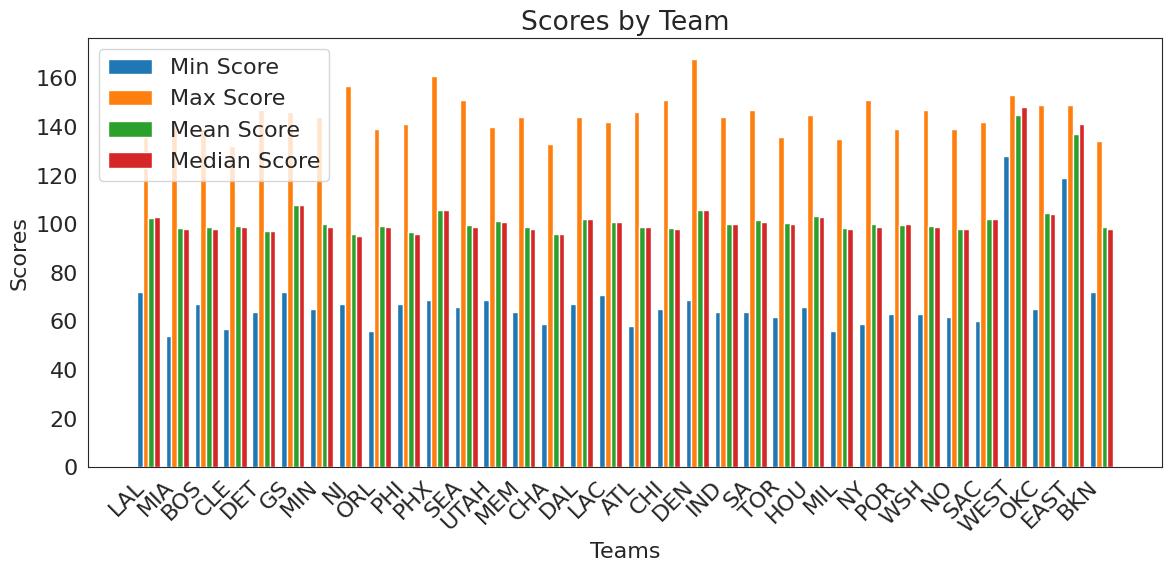

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data for plotting
teams = list(team_scores.keys())
min_scores = [team_scores[team]['min_score'] for team in teams]
max_scores = [team_scores[team]['max_score'] for team in teams]
mean_scores = [team_scores[team]['mean_score'] for team in teams]
median_scores = [team_scores[team]['median_score'] for team in teams]

# Create a grouped bar chart
x = np.arange(len(teams))  # Team indices
width = 0.2  # Width of bars

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - 1.5 * width, min_scores, width, label='Min Score')
ax.bar(x - 0.5 * width, max_scores, width, label='Max Score')
ax.bar(x + 0.5 * width, mean_scores, width, label='Mean Score')
ax.bar(x + 1.5 * width, median_scores, width, label='Median Score')

# Formatting
ax.set_xlabel('Teams')
ax.set_ylabel('Scores')
ax.set_title('Scores by Team')
ax.set_xticks(x)
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


### Highest Scores per Game Type Graphed

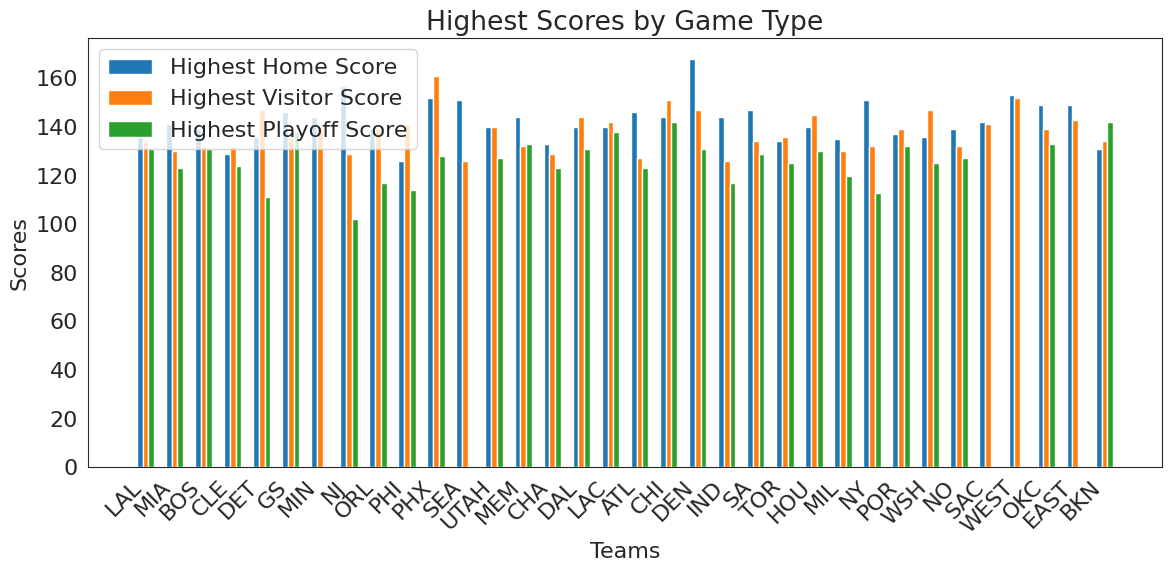

In [55]:
# Extract data for plotting
highest_home_scores = [team_highest_scores_by_game_type[team]['highest_home_score'] for team in teams]
highest_visitor_scores = [team_highest_scores_by_game_type[team]['highest_visitor_score'] for team in teams]
highest_playoff_scores = [team_highest_scores_by_game_type[team]['highest_playoff_score'] for team in teams]

# Create a grouped bar chart
x = np.arange(len(teams))  # Team indices
width = 0.2  # Width of bars

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, highest_home_scores, width, label='Highest Home Score')
ax.bar(x, highest_visitor_scores, width, label='Highest Visitor Score')
ax.bar(x + width, highest_playoff_scores, width, label='Highest Playoff Score')

# Formatting
ax.set_xlabel('Teams')
ax.set_ylabel('Scores')
ax.set_title('Highest Scores by Game Type')
ax.set_xticks(x)
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


## Percentage of Game Types from Total per Team

In [56]:
# Calculate the percentage of games played at home, as visitors, and during playoffs for each team
team_game_percentages = {}

for team in teams:
    total_games = len(original_data[(original_data['home_team'] == team) | (original_data['visit_team'] == team)])

    home_games = len(original_data[original_data['home_team'] == team])
    visitor_games = len(original_data[original_data['visit_team'] == team])
    playoff_games = len(original_data[((original_data['home_team'] == team) | (original_data['visit_team'] == team)) & (original_data['playoffs'] == 1)])

    team_game_percentages[team] = {
        'home_games_percentage': (home_games / total_games) * 100 if total_games > 0 else 0,
        'visitor_games_percentage': (visitor_games / total_games) * 100 if total_games > 0 else 0,
        'playoff_games_percentage': (playoff_games / total_games) * 100 if total_games > 0 else 0
    }

# Display the percentages
for team, percentages in team_game_percentages.items():
    print(f"Game percentages for {team}:")
    for category, percentage in percentages.items():
        print(f"  {category}: {percentage:.2f}%")
    print()


Game percentages for LAL:
  home_games_percentage: 50.23%
  visitor_games_percentage: 49.77%
  playoff_games_percentage: 11.66%

Game percentages for MIA:
  home_games_percentage: 50.38%
  visitor_games_percentage: 49.62%
  playoff_games_percentage: 12.86%

Game percentages for BOS:
  home_games_percentage: 49.24%
  visitor_games_percentage: 50.76%
  playoff_games_percentage: 12.48%

Game percentages for CLE:
  home_games_percentage: 48.73%
  visitor_games_percentage: 51.27%
  playoff_games_percentage: 11.44%

Game percentages for DET:
  home_games_percentage: 50.55%
  visitor_games_percentage: 49.45%
  playoff_games_percentage: 5.28%

Game percentages for GS:
  home_games_percentage: 49.94%
  visitor_games_percentage: 50.06%
  playoff_games_percentage: 8.93%

Game percentages for MIN:
  home_games_percentage: 50.06%
  visitor_games_percentage: 49.94%
  playoff_games_percentage: 0.00%

Game percentages for NJ:
  home_games_percentage: 50.30%
  visitor_games_percentage: 49.70%
  playoff

### Percentage of Game Types per Team Graphed

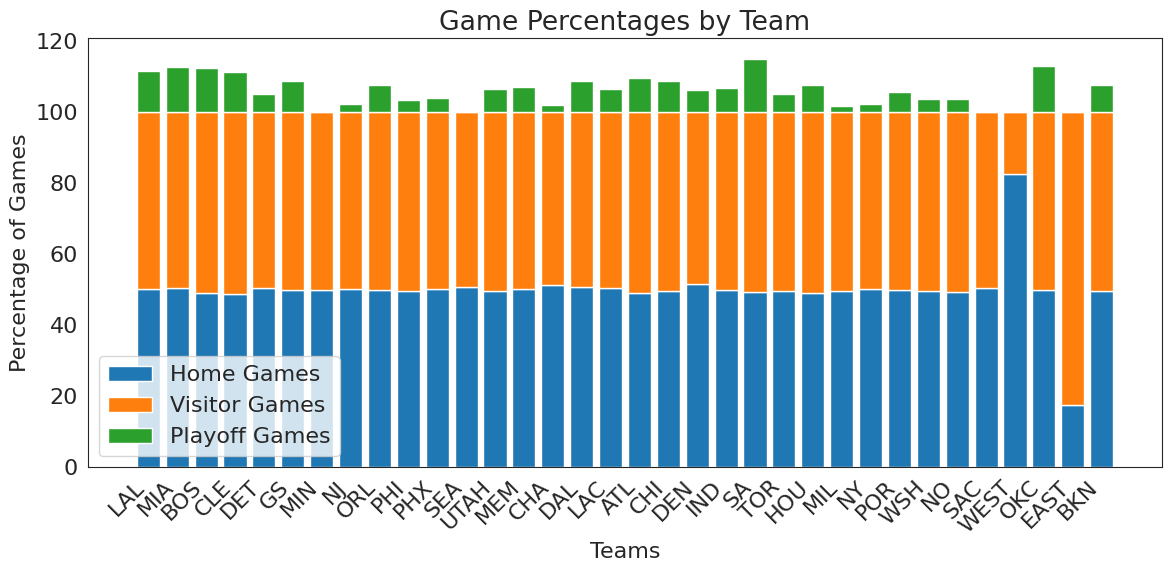

In [57]:
# Extract data for plotting
home_percentages = [team_game_percentages[team]['home_games_percentage'] for team in teams]
visitor_percentages = [team_game_percentages[team]['visitor_games_percentage'] for team in teams]
playoff_percentages = [team_game_percentages[team]['playoff_games_percentage'] for team in teams]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(teams, home_percentages, label='Home Games')
ax.bar(teams, visitor_percentages, bottom=home_percentages, label='Visitor Games')
ax.bar(teams, playoff_percentages, bottom=np.array(home_percentages) + np.array(visitor_percentages), label='Playoff Games')

# Formatting
ax.set_xlabel('Teams')
ax.set_ylabel('Percentage of Games')
ax.set_title('Game Percentages by Team')
ax.set_xticks(range(len(teams)))
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


## Maybe looking at trends per Team ?

### Team Trends maybe???

<ipython-input-58-26f3305a1cef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games['team_score'] = team_games.apply(


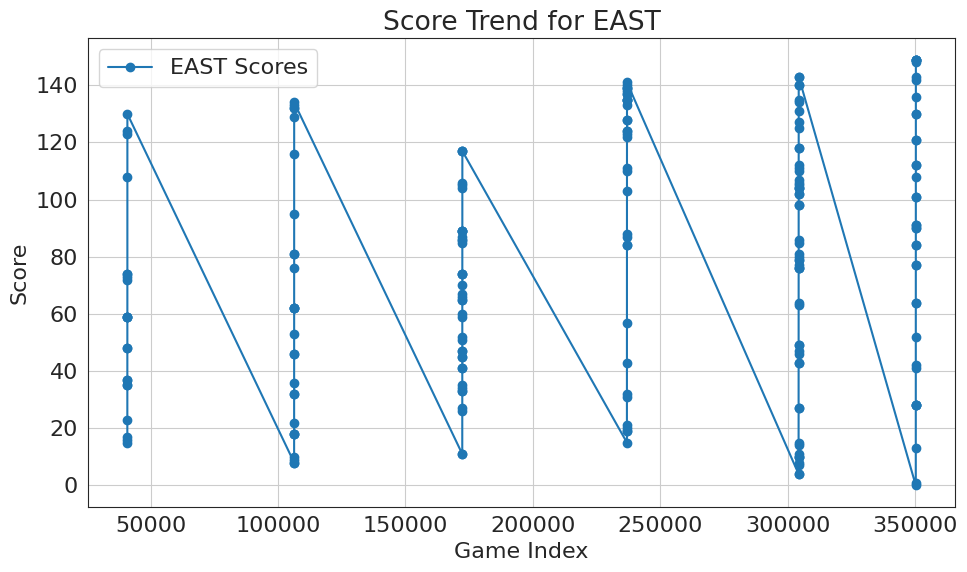

In [58]:
import matplotlib.pyplot as plt

# Example: Filter data for a specific team
team_name = "EAST"
team_games = original_data[(original_data['home_team'] == team_name) | (original_data['visit_team'] == team_name)]

# Create a new column to track the team's score per game
team_games['team_score'] = team_games.apply(
    lambda row: row['home_score'] if row['home_team'] == team_name else row['visit_score'], axis=1
)

# Sort by the game date or sequence (if available)
team_games = team_games.sort_index()  # Adjust if there's a date or sequence column

# Plot the trend line
plt.figure(figsize=(10, 6))
plt.plot(team_games.index, team_games['team_score'], marker='o', label=f"{team_name} Scores")

# Formatting
plt.title(f"Score Trend for {team_name}")
plt.xlabel("Game Index")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Overall Average Score per Game Type

In [59]:
# Calculate average scores for each game type
average_scores_by_game_type = {
    'home_games_average_score': original_data[original_data['home_team'].notnull()]['home_final_score'].mean(),
    'visitor_games_average_score': original_data[original_data['visit_team'].notnull()]['visit_final_score'].mean(),
    'playoff_games_average_score': original_data[original_data['playoffs'] == True][['home_final_score', 'visit_final_score']].mean().mean()
}

# Display the results
for game_type, avg_score in average_scores_by_game_type.items():
    print(f"{game_type.replace('_', ' ')}: {avg_score:.2f}")


home games average score: 102.04
visitor games average score: 98.99
playoff games average score: 97.65


### Overall Average Scores by Game Types Graphed

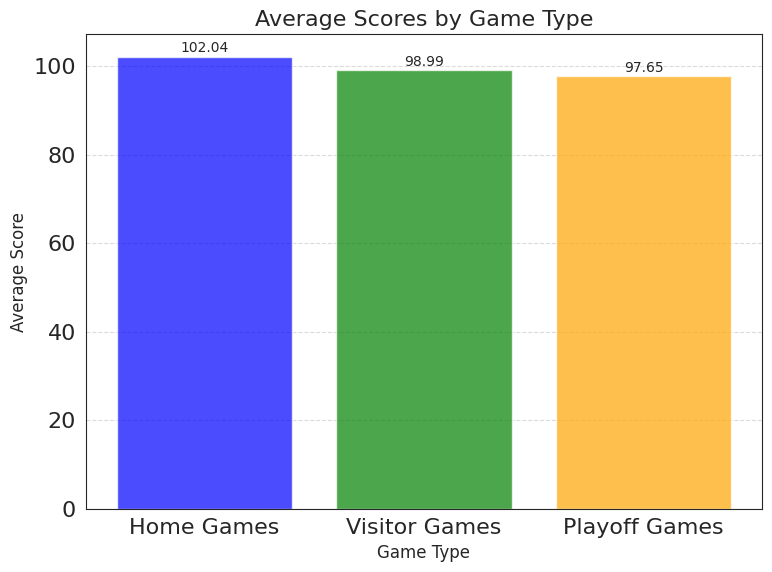

In [60]:
# Calculate average scores for each game type
average_scores_by_game_type = {
    'Home Games': original_data[original_data['home_team'].notnull()]['home_final_score'].mean(),
    'Visitor Games': original_data[original_data['visit_team'].notnull()]['visit_final_score'].mean(),
    'Playoff Games': original_data[original_data['playoffs'] == True][['home_final_score', 'visit_final_score']].mean().mean()
}

# Extract keys (game types) and values (average scores)
game_types = list(average_scores_by_game_type.keys())
average_scores = list(average_scores_by_game_type.values())

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(game_types, average_scores, color=['blue', 'green', 'orange'], alpha=0.7)

# Add labels and title
plt.title("Average Scores by Game Type", fontsize=16)
plt.xlabel("Game Type", fontsize=12)
plt.ylabel("Average Score", fontsize=12)

# Add score labels on top of each bar
for i, score in enumerate(average_scores):
    plt.text(i, score + 1, f"{score:.2f}", ha='center', fontsize=10)

# Display the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


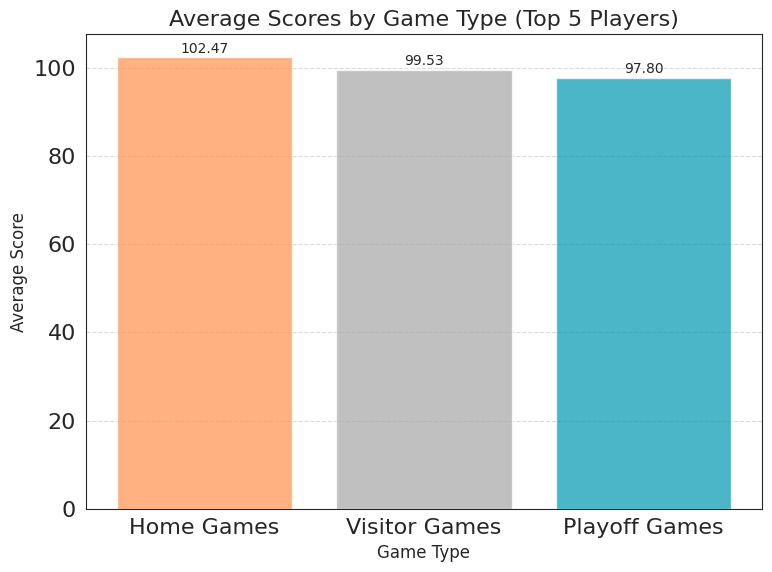

In [61]:

player_colors = {
    'LeBron James': '#ff914d',
    'Kevin Durant': '#a6a6a6',
    'Kobe Bryant': '#0097b2',
    'Carmelo Anthony': '#ff3131',
    'Dwight Howard': '#0cc0df'
}

# Filter data for only the top 5 players
filtered_data = original_data[original_data['player'].isin(player_colors.keys())]

# Calculate average scores for each game type (only for filtered players)
average_scores_by_game_type = {
    'Home Games': filtered_data[filtered_data['home_team'].notnull()]['home_final_score'].mean(),
    'Visitor Games': filtered_data[filtered_data['visit_team'].notnull()]['visit_final_score'].mean(),
    'Playoff Games': filtered_data[filtered_data['playoffs'] == True][['home_final_score', 'visit_final_score']].mean().mean()
}

# Extract keys (game types) and values (average scores)
game_types = list(average_scores_by_game_type.keys())
average_scores = list(average_scores_by_game_type.values())

# Assign colors from the dictionary (cycling through them for game types)
colors = list(player_colors.values())[:len(game_types)]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(game_types, average_scores, color=colors, alpha=0.7)

# Add labels and title
plt.title("Average Scores by Game Type (Top 5 Players)", fontsize=16)
plt.xlabel("Game Type", fontsize=12)
plt.ylabel("Average Score", fontsize=12)

# Add score labels on top of each bar
for i, score in enumerate(average_scores):
    plt.text(i, score + 1, f"{score:.2f}", ha='center', fontsize=10)

# Display the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Last X minute player performance


In [62]:
original_data.head()

,period,player,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,season_start,shot_count
0,1,Andrew Bynum,0,1,LAL,PHX,1,0,114,106,47.000000,2006,1
1,1,Andrew Bynum,0,1,LAL,PHX,2,0,114,106,47.000000,2006,2
2,1,Andrew Bynum,0,1,LAL,PHX,12,18,114,106,29.733333,2006,1
3,1,Andrew Bynum,0,0,LAL,PHX,12,18,114,106,29.733333,2006,2
4,1,Shawn Marion,0,1,LAL,PHX,12,21,114,106,29.200000,2006,1


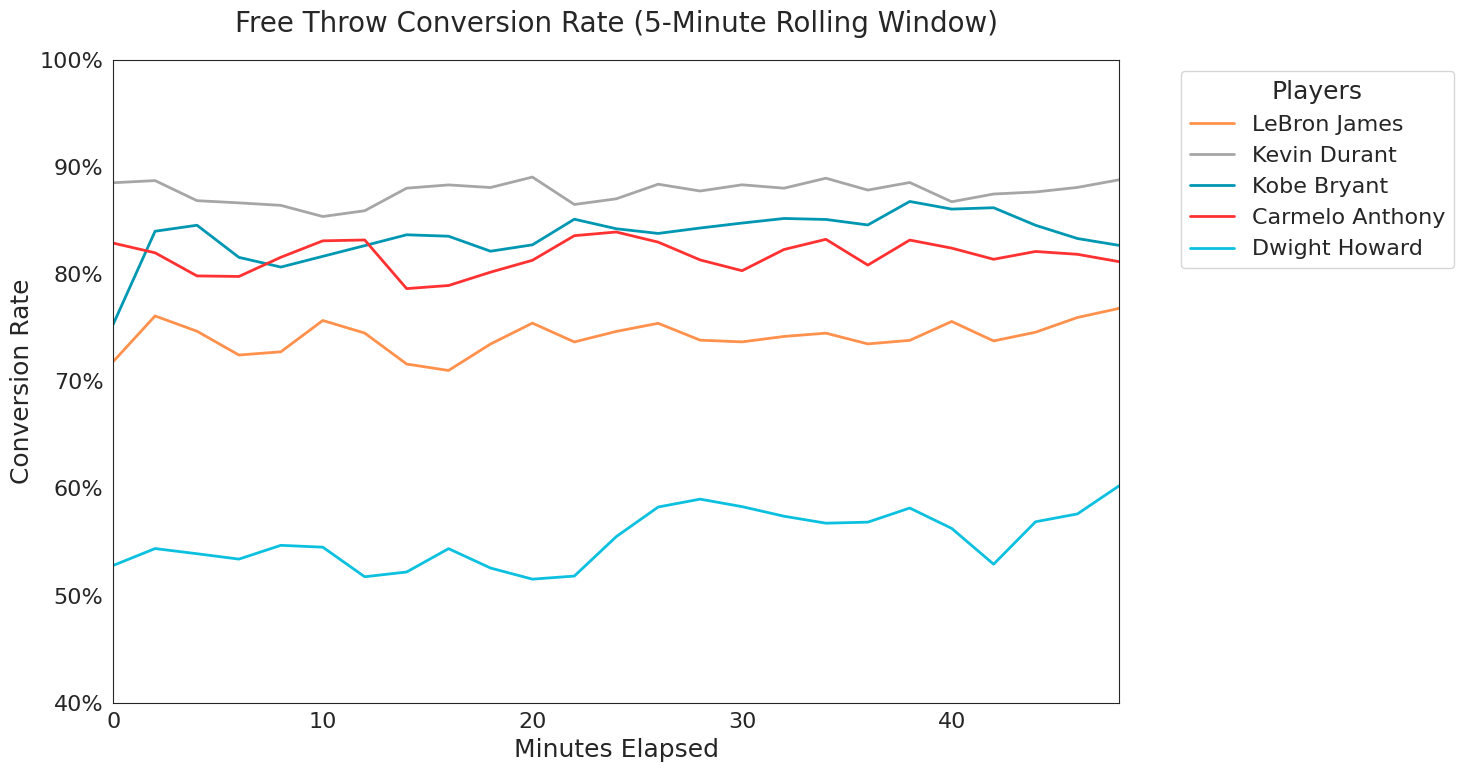

In [63]:
def get_player_conversion_rate(player_data, minute, window=5):
    window_data = player_data[
        (player_data['minutes_elapsed'] >= minute - window/2) &
        (player_data['minutes_elapsed'] <= minute + window/2)
    ]
    if len(window_data) < 3:
        return None
    return window_data['shot_made'].sum() / len(window_data)

def analyze_top_players_performance(original_data, num_players=5):
    original_data['minutes_elapsed'] = 48 - original_data['minutes']

    player_shots = original_data.groupby(['player'])['shot_made'].sum().reset_index()
    top_players = player_shots.sort_values(by='shot_made', ascending=False).head(num_players)

    performance_data = {
        'minute': list(range(0, 49, 2))
    }

    for player in top_players['player']:
        player_data = original_data[original_data['player'] == player]
        rates = []
        for minute in performance_data['minute']:
            rate = get_player_conversion_rate(player_data, minute)
            rates.append(rate)
        performance_data[player] = rates

    return pd.DataFrame(performance_data)

def plot_performance(performance_df):
    plt.rcParams.update({'font.size': 16})

    plt.figure(figsize=(15, 8))
    sns.set_style("white")

    player_colors = {
        'LeBron James': '#ff914d',
        'Kevin Durant': '#a6a6a6',
        'Kobe Bryant': '#0097b2',
        'Carmelo Anthony': '#ff3131',
        'Dwight Howard': '#0cc0df'
    }

    player_columns = [col for col in performance_df.columns if col != 'minute']
    for player in player_columns:
        mask = performance_df[player].notna()
        plt.plot(performance_df.loc[mask, 'minute'],
                performance_df.loc[mask, player],
                label=player,
                color=player_colors.get(player),
                linewidth=2)

    plt.title('Free Throw Conversion Rate (5-Minute Rolling Window)', fontsize=20, pad=20)
    plt.xlabel('Minutes Elapsed', fontsize=18)
    plt.ylabel('Conversion Rate', fontsize=18)
    plt.legend(title='Players', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, title_fontsize=18)
    plt.ylim(0.4, 1.0)
    plt.xlim(0, 48)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    plt.tight_layout()
    return plt

performance_df = analyze_top_players_performance(original_data)
plt = plot_performance(performance_df)
plt.show()

In [64]:
# Load the CSV file
free_throws_df = pd.read_csv('/content/drive/Shareddrives/MATH 2327 3439 - Data/data/free_throws.csv')

# Group by home_team and player, then get the sum of shot_made for each player
best_players_by_home_team = free_throws_df.groupby(['home_team', 'player'])['shot_made'].sum()

# For each home team, get the player with the maximum shots made
best_players_by_home_team = best_players_by_home_team.loc[best_players_by_home_team.groupby('home_team').idxmax()]

# Reset index and display the result
best_players_by_home_team = best_players_by_home_team.reset_index()

# Show the result
display(best_players_by_home_team)

,home_team,player,shot_made
0,ATL,Josh Smith,972
1,BKN,Brook Lopez,511
2,BOS,Paul Pierce,1511
3,CHA,Gerald Wallace,951
4,CHI,Luol Deng,928
5,CLE,LeBron James,1805
6,DAL,Dirk Nowitzki,2226
7,DEN,Carmelo Anthony,1233
8,DET,Rodney Stuckey,941
9,EAST,Kobe Bryant,7


In [65]:
import pandas as pd

# Load the CSV file
free_throws_df = pd.read_csv('/content/drive/Shareddrives/MATH 2327 3439 - Data/data/free_throws.csv')

# Group by home_team and player, then get the sum of shot_made for each player
best_players_by_home_team = free_throws_df.groupby(['home_team', 'player'])['shot_made'].sum()

# For each home team, get the player with the maximum shots made
best_players_by_home_team = best_players_by_home_team.loc[best_players_by_home_team.groupby('home_team').idxmax()]

# Reset index and sort by shot_made in descending order
best_players_by_home_team = best_players_by_home_team.reset_index()
#best_players_by_home_team = best_players_by_home_team.sort_values(by='shot_made', ascending=False)

# Show the result
display(best_players_by_home_team)

,home_team,player,shot_made
0,ATL,Josh Smith,972
1,BKN,Brook Lopez,511
2,BOS,Paul Pierce,1511
3,CHA,Gerald Wallace,951
4,CHI,Luol Deng,928
5,CLE,LeBron James,1805
6,DAL,Dirk Nowitzki,2226
7,DEN,Carmelo Anthony,1233
8,DET,Rodney Stuckey,941
9,EAST,Kobe Bryant,7


In [66]:
best_players_by_home_team.head()

,home_team,player,shot_made
0,ATL,Josh Smith,972
1,BKN,Brook Lopez,511
2,BOS,Paul Pierce,1511
3,CHA,Gerald Wallace,951
4,CHI,Luol Deng,928


In [67]:
# Load the CSV file
free_throws_df = pd.read_csv('/content/drive/Shareddrives/MATH 2327 3439 - Data/data/free_throws.csv')

# Group by home_team and player, then get the sum of shot_made for each player
best_players_by_home_team = free_throws_df.groupby(['home_team', 'player'])['shot_made'].sum()

# For each home team, get the player with the maximum shots made
best_players_by_home_team = best_players_by_home_team.loc[best_players_by_home_team.groupby('home_team').idxmax()]

# Reset index
best_players_by_home_team = best_players_by_home_team.reset_index()

# Sort by shot_made in descending order and add a rank column (without decimals)
best_players_by_home_team = best_players_by_home_team.sort_values(by='shot_made', ascending=False)
# best_players_by_home_team['rank'] = best_players_by_home_team['shot_made'].rank(method='min', ascending=False).astype(int)

# Rearrange columns and remove the numerical index
best_players_by_home_team = best_players_by_home_team[['home_team', 'player', 'shot_made']].reset_index().drop(columns='index', axis='column')

# Display the result
display(best_players_by_home_team)

,home_team,player,shot_made
0,OKC,Kevin Durant,2429
1,LAL,Kobe Bryant,2373
2,MIA,Dwyane Wade,2293
3,DAL,Dirk Nowitzki,2226
4,CLE,LeBron James,1805
5,ORL,Dwight Howard,1594
6,HOU,James Harden,1514
7,BOS,Paul Pierce,1511
8,SA,Tim Duncan,1454
9,TOR,DeMar DeRozan,1426


In [68]:
# Load the CSV file
free_throws_df = pd.read_csv('/content/drive/Shareddrives/MATH 2327 3439 - Data/data/free_throws.csv')

# Group by home_team and sum up the shot_made values for each team
team_shots = free_throws_df.groupby('home_team')['shot_made'].sum().reset_index()

# Identify the best team (with the most shots made) and the worst team (with the least shots made)
best_team = team_shots.loc[team_shots['shot_made'].idxmax()]
worst_team = team_shots.loc[team_shots['shot_made'].idxmin()]

# Display the result
print(f"Best team: {best_team['home_team']} with {best_team['shot_made']} shots made.")
print(f"Worst team: {worst_team['home_team']} with {worst_team['shot_made']} shots made.")

Best team: DEN with 17426 shots made.
Worst team: EAST with 25 shots made.


In [69]:
# Group by home_team and player, then get the sum of shot_made for each player
player_shots = free_throws_df.groupby(['home_team', 'player'])['shot_made'].sum().reset_index()

# Find the best player for each team based on the most shots made
best_players_by_team = player_shots.loc[player_shots.groupby('home_team')['shot_made'].idxmax()]

# Sort the teams by most shots made by the best player
best_players_by_team_sorted = best_players_by_team.sort_values(by='shot_made', ascending=False)

# Reset index to avoid large numerical values in the first column
best_players_by_team_sorted.reset_index(drop=True, inplace=True)

# Display the result
display(best_players_by_team_sorted)

,home_team,player,shot_made
0,OKC,Kevin Durant,2429
1,LAL,Kobe Bryant,2373
2,MIA,Dwyane Wade,2293
3,DAL,Dirk Nowitzki,2226
4,CLE,LeBron James,1805
5,ORL,Dwight Howard,1594
6,HOU,James Harden,1514
7,BOS,Paul Pierce,1511
8,SA,Tim Duncan,1454
9,TOR,DeMar DeRozan,1426


In [70]:
# Load the CSV file
free_throws_df = pd.read_csv('/content/drive/Shareddrives/MATH 2327 3439 - Data/data/free_throws.csv')

# Group by player and sum up the shot_made values for each player
player_shots = free_throws_df.groupby(['player'])['shot_made'].sum().reset_index()

# Sort the players by shot_made in descending order and get the top 5
top_5_players = player_shots.sort_values(by='shot_made', ascending=False).head(5)

# Merge with the original dataframe to get the minutes for these top 5 players
top_5_players_minutes = free_throws_df[free_throws_df['player'].isin(top_5_players['player'])]

# # Group by player and sum the minutes to get the total minutes played per player
player_minutes = top_5_players_minutes.groupby('player')['minutes'].sum().reset_index()

# # Calculate the number of times each player appears to calculate the average
player_counts = top_5_players_minutes.groupby('player')['minutes'].count().reset_index()

# # Merge to get the total minutes played and the count of records for each player
player_minutes = pd.merge(player_minutes, player_counts[['player', 'minutes']], on='player', suffixes=('_total', '_count'))

# # Calculate the average minutes by dividing total minutes by the number of appearances
player_minutes['average_minutes'] = player_minutes['minutes_total'] / player_minutes['minutes_count']

# Display the result
player_minutes[['player', 'average_minutes']].sort_values(by='average_minutes', ascending=False)


,player,average_minutes
1,Dwight Howard,20.853977
0,Carmelo Anthony,17.895713
2,Kevin Durant,17.832062
3,Kobe Bryant,17.527899
4,LeBron James,17.195442


In [71]:
# Load the CSV file
free_throws_df = pd.read_csv('/content/drive/Shareddrives/MATH 2327 3439 - Data/data/free_throws.csv')

# Group by player and sum up the shot_made values for each player
player_shots = free_throws_df.groupby(['player'])['shot_made'].sum().reset_index()

# Sort the players by shot_made in descending order and get the top 5
top_5_players = player_shots.sort_values(by='shot_made', ascending=False).head(5).reset_index(drop=True)

# Display the top 5 players
print(top_5_players)


            player  shot_made
0     LeBron James       5957
1     Kevin Durant       5293
2      Kobe Bryant       4702
3  Carmelo Anthony       4360
4    Dwight Howard       4302


# This section looks at both teams and players in relation to one another

## Top Performers

Top 5 Teams per Game Type

In [72]:
# Top 5 Teams in Home Games
top_5_teams_home = (
    original_data.groupby('home_team')['shot_made']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index())

# Top 5 Teams as Visitors
top_5_teams_visitor = (
    original_data.groupby('visit_team')['shot_made']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index())

# Top 5 Teams in Playoff Games
top_5_teams_playoffs = (
    original_data[original_data['playoffs'] == True]
    .groupby('home_team')['shot_made']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index())

# Print Results
print("=== Top 5 Teams ===")
print("\nTop 5 Teams (Home Games):")
print(top_5_teams_home)
print("\nTop 5 Teams (Visitor Games):")
print(top_5_teams_visitor)
print("\nTop 5 Teams (Playoff Games):")
print(top_5_teams_playoffs)

=== Top 5 Teams ===

Top 5 Teams (Home Games):
  home_team  shot_made
0       DEN      17426
1        GS      16665
2       BOS      16636
3      UTAH      16591
4       MIA      16529

Top 5 Teams (Visitor Games):
  visit_team  shot_made
0        BOS      17194
1       UTAH      16875
2         GS      16678
3        DEN      16446
4        LAL      16358

Top 5 Teams (Playoff Games):
  home_team  shot_made
0       MIA       2247
1        SA       2239
2       BOS       2147
3       LAL       2017
4       OKC       1964


Top 5 Players per Game Type

In [73]:
# Top 5 Players in Home Games
top_5_players_home = (
    original_data.groupby('player')['shot_made']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# Top 5 Players as Visitors
top_5_players_visitor = (
    original_data.groupby('player')['shot_made']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# Top 5 Players in Playoff Games
top_5_players_playoffs = (
    original_data[original_data['playoffs'] == True]
    .groupby('player')['shot_made']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# Print Results
print("\n=== Top 5 Players ===")
print("\nTop 5 Players (Home Games):")
print(top_5_players_home)
print("\nTop 5 Players (Visitor Games):")
print(top_5_players_visitor)
print("\nTop 5 Players (Playoff Games):")
print(top_5_players_playoffs)


=== Top 5 Players ===

Top 5 Players (Home Games):
            player  shot_made
0     LeBron James       5957
1     Kevin Durant       5293
2      Kobe Bryant       4702
3  Carmelo Anthony       4360
4    Dwight Howard       4302

Top 5 Players (Visitor Games):
            player  shot_made
0     LeBron James       5957
1     Kevin Durant       5293
2      Kobe Bryant       4702
3  Carmelo Anthony       4360
4    Dwight Howard       4302

Top 5 Players (Playoff Games):
         player  shot_made
0  LeBron James       1260
1  Kevin Durant        682
2   Kobe Bryant        647
3   Paul Pierce        553
4   Dwyane Wade        538


Top 5 Players per Top 5 Team

In [74]:
# # Function to calculate top 5 players for a list of teams with totals and percentages
# def top_5_players_for_teams_with_totals_and_percentages(data, team_list, team_column):

#     filtered_data = data[data[team_column].isin(team_list)]

#     # Group by team and player, and calculate total shots made and total attempts
#     player_stats = (
#         filtered_data.groupby([team_column, 'player'])
#         .agg(
#             total_shots_made=('shot_made', 'sum'),
#             total_shots_attempted=('shot_made', 'count')  # Count all rows for total attempts
#         )
#         .reset_index()
#     )

#     # Create a new column for shots made out of total attempts (formatted as X/Y)
#     player_stats['shots_made_out_of_total'] = (
#         player_stats['total_shots_made'].astype(str) + '/' +
#         player_stats['total_shots_attempted'].astype(str)
#     )

#     # Calculate the percentage of shots made
#     player_stats['percentage_shots_made'] = (
#         (player_stats['total_shots_made'] / player_stats['total_shots_attempted']) * 100
#     ).round(2)

#     # Sort by team and total shots made, then select the top 5 players per team
#     top_players = (
#         player_stats.sort_values(by=[team_column, 'total_shots_made'], ascending=[True, False])
#         .groupby(team_column)
#         .head(5)
#         .reset_index(drop=True)
#     )

#     return top_players

# # Top 5 Players for Top 5 Teams (Home Games)
# top_5_players_home_teams_totals_percentages = top_5_players_for_teams_with_totals_and_percentages(
#     original_data, original_data[''], 'home_team'
# )

# # Top 5 Players for Top 5 Teams (Visitor Games)
# top_5_players_visitor_teams_totals_percentages = top_5_players_for_teams_with_totals_and_percentages(
#     original_data, top_5_teams_visitor_list, 'visit_team'
# )

# # Top 5 Players for Top 5 Teams (Playoff Games)
# top_5_players_playoffs_teams_totals_percentages = top_5_players_for_teams_with_totals_and_percentages(
#     original_data, top_5_teams_playoffs_list, 'home_team'
# )

# # Print Results
# print("\n=== Top 5 Players Per Top 5 Home Teams (With Totals and Percentages) ===")
# print(top_5_players_home_teams_totals_percentages[
#     ['home_team', 'player', 'shots_made_out_of_total', 'percentage_shots_made']
# ])

# print("\n=== Top 5 Players Per Top 5 Visitor Teams (With Totals and Percentages) ===")
# print(top_5_players_visitor_teams_totals_percentages[
#     ['visit_team', 'player', 'shots_made_out_of_total', 'percentage_shots_made']
# ])

# print("\n=== Top 5 Players Per Top 5 Playoff Teams (With Totals and Percentages) ===")
# print(top_5_players_playoffs_teams_totals_percentages[
#     ['home_team', 'player', 'shots_made_out_of_total', 'percentage_shots_made']
# ])


In [75]:
original_data.head()

,period,player,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,season_start,shot_count,minutes_elapsed
0,1,Andrew Bynum,0,1,LAL,PHX,1,0,114,106,47.000000,2006,1,1.000000
1,1,Andrew Bynum,0,1,LAL,PHX,2,0,114,106,47.000000,2006,2,1.000000
2,1,Andrew Bynum,0,1,LAL,PHX,12,18,114,106,29.733333,2006,1,18.266667
3,1,Andrew Bynum,0,0,LAL,PHX,12,18,114,106,29.733333,2006,2,18.266667
4,1,Shawn Marion,0,1,LAL,PHX,12,21,114,106,29.200000,2006,1,18.800000


In [76]:
original_data.groupby('season_start')['shot_made'].agg('sum').reset_index().sort_values(by='shot_made', ascending=False)

,season_start,shot_made
0,2006,50841
2,2008,50320
1,2007,49494
3,2009,49153
4,2010,49013
7,2013,47127
9,2015,46389
8,2014,45005
6,2012,43881
5,2011,36466


If X player performed well during Y season, did it result it their team making playoffs?

- Did team make playoffs?
If X team's 'playoff' column value is > 0, then it made playoffs.

- How are we going to define a good performance?

Mean on shots made (%), base our top 5 players on that mean, so the 5 that are the furthest away, closest to 1.

1. Filter by season
2. Filter by season games
3. Filter the players taken into account based on the mean of total_shots taken per player.
2. Get the mean accuracy for all players
3. Get top 5 players based on mean and accuracy during season games
4. Did their team make playoffs?


Using the mean as a cutoff instead of the median for the total_shots made to prioritize including high-volume shooters in the analysis.

In [77]:
def analyze_season_performance_with_cutoff(data, season_year):
    # Step 1: Filter data for the specified season
    season_data = data[data['season_start'] == season_year]

    # Step 2: Calculate total shots made and conversion rates for each player
    player_conversion = (
        season_data.groupby('player')
        .agg({'shot_made': 'sum', 'period': 'count'})  # 'period' counts total attempts
        .reset_index()
    )
    player_conversion.rename(columns={'period': 'total_shots'}, inplace=True)
    player_conversion['conversion_rate'] = player_conversion['shot_made'] / player_conversion['total_shots']

    # Step 3: Calculate the mean of total shots made
    mean_total_shots = player_conversion['total_shots'].mean()

    # Step 4: Filter players based on the mean total shots made
    filtered_players = player_conversion[player_conversion['total_shots'] >= mean_total_shots].copy()

    # Step 5: Calculate the mean conversion rate for filtered players
    mean_conversion = filtered_players['conversion_rate'].mean()

    # Step 6: Find top 5 players closest to the mean conversion rate
    filtered_players['distance_from_mean'] = abs(filtered_players['conversion_rate'] - mean_conversion)
    top_5_players = filtered_players.nsmallest(5, 'distance_from_mean')

    # Step 7: Check if their teams made the playoffs
    playoff_data = season_data[season_data['player'].isin(top_5_players['player'])]
    playoff_status = playoff_data.groupby('player')['playoffs'].max().reset_index()
    playoff_status['made_playoffs'] = playoff_status['playoffs'] > 0

    # Combine results
    result = top_5_players.merge(playoff_status[['player', 'made_playoffs']], on='player')
    return result


In [78]:
def analyze_all_seasons(data):
    # Get all unique seasons
    seasons = data['season_start'].unique()

    # Collect results for all seasons
    all_results = []
    for season in seasons:
        season_results = analyze_season_performance_with_cutoff(data, season)
        season_results['season_start'] = season  # Add season info to the results
        all_results.append(season_results)

    # Combine all results into a single DataFrame
    combined_results = pd.concat(all_results, ignore_index=True)
    return combined_results

# Analyze performance across all seasons
all_seasons_results = analyze_all_seasons(original_data)

# Calculate the percentage of top-5 players whose teams made the playoffs
total_top_5 = len(all_seasons_results)
made_playoffs = all_seasons_results['made_playoffs'].sum()
playoff_percentage = (made_playoffs / total_top_5) * 100

# Display the results
total_top_5, made_playoffs, playoff_percentage


(50, 34, 68.0)

In [79]:
original_data.head()

,period,player,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,season_start,shot_count,minutes_elapsed
0,1,Andrew Bynum,0,1,LAL,PHX,1,0,114,106,47.000000,2006,1,1.000000
1,1,Andrew Bynum,0,1,LAL,PHX,2,0,114,106,47.000000,2006,2,1.000000
2,1,Andrew Bynum,0,1,LAL,PHX,12,18,114,106,29.733333,2006,1,18.266667
3,1,Andrew Bynum,0,0,LAL,PHX,12,18,114,106,29.733333,2006,2,18.266667
4,1,Shawn Marion,0,1,LAL,PHX,12,21,114,106,29.200000,2006,1,18.800000


PLOT THIS

TOP 5 PLAYER PLAYOFF CONTENTION PERCENTAGE

Pretty much, looking at the top 5 players, check if they made playoffs during the season for each player. Sum all of that up, and say hey, from the top 5, they made 39 out of 49 playoffs.

In [80]:
def analyze_top_5_playoff_correlation(data, top_5_players):
    # Step 1: Filter data for the specified top 5 players
    filtered_data = data[data['player'].isin(top_5_players)]

    # Step 2: Check playoff status for each player per season
    playoff_status = (
        filtered_data.groupby(['player', 'season_start'])['playoffs']
        .max()
        .reset_index()
    )

    # Step 3: Add a column indicating whether the team made the playoffs
    playoff_status['made_playoffs'] = playoff_status['playoffs'] > 0

    # Step 4: Aggregate the playoff results
    total_seasons = len(playoff_status)
    total_made_playoffs = playoff_status['made_playoffs'].sum()
    playoff_percentage = (total_made_playoffs / total_seasons).round(2)

    # Step 5: Return results
    return {
        'total_seasons': total_seasons,
        'made_playoffs': total_made_playoffs,
        'playoff_percentage': playoff_percentage
    }

# Define the top 5 players
top_5_players = ['LeBron James', 'Kevin Durant', 'Kobe Bryant', 'Carmelo Anthony', 'Dwight Howard']

# Analyze the correlation
playoff_results = analyze_top_5_playoff_correlation(original_data, top_5_players)

# Display the results
playoff_results


{'total_seasons': 49, 'made_playoffs': 38, 'playoff_percentage': 0.78}

<ipython-input-81-97f06271e126>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


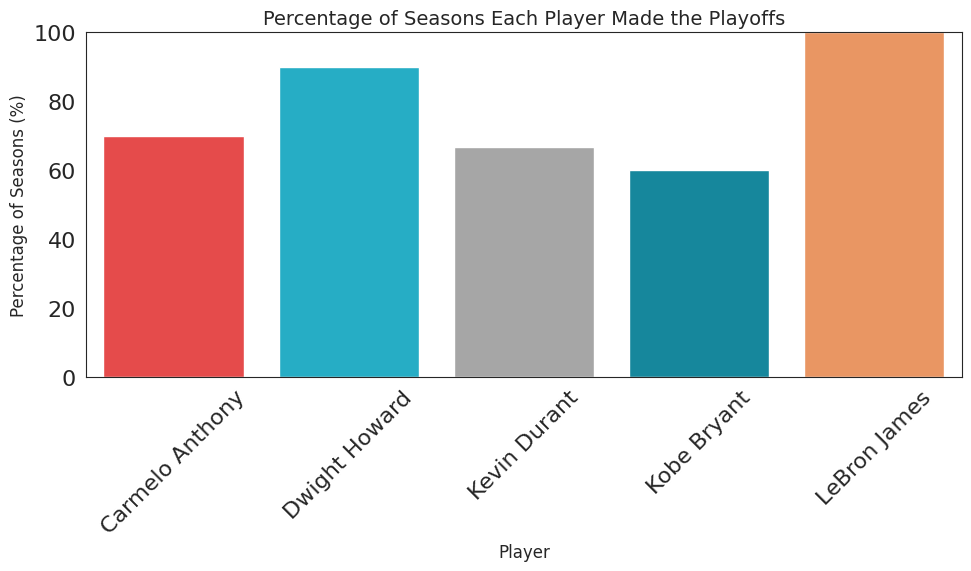

In [81]:
# Define player colors
player_colors = {
    'LeBron James': '#ff914d',
    'Kevin Durant': '#a6a6a6',
    'Kobe Bryant': '#0097b2',
    'Carmelo Anthony': '#ff3131',
    'Dwight Howard': '#0cc0df'
}

# List of top 5 players
top_5_players = ['LeBron James', 'Kevin Durant', 'Kobe Bryant', 'Carmelo Anthony', 'Dwight Howard']

# Filter data for only the top 5 players
filtered_data = original_data[original_data['player'].isin(top_5_players)]

# Check if a player's team made the playoffs in each season
playoff_status = (
    filtered_data.groupby(['player', 'season_start'])['playoffs']
    .max()  # A team making the playoffs in a season is indicated by any "playoffs > 0" value
    .reset_index()
)
playoff_status['made_playoffs'] = playoff_status['playoffs'] > 0

# Calculate the percentage of seasons each player made the playoffs
player_playoff_percentage = (
    playoff_status.groupby('player')['made_playoffs']
    .mean()  # Mean of `True` values gives the percentage of seasons making playoffs
    .reset_index()
)
player_playoff_percentage['percentage'] = player_playoff_percentage['made_playoffs'] * 100

# Create color list in the same order as the data
colors = [player_colors[player] for player in player_playoff_percentage['player']]

# Plot the bar histogram chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='player',
    y='percentage',
    data=player_playoff_percentage,
    palette=colors  # Use our custom colors
)

plt.title('Percentage of Seasons Each Player Made the Playoffs', fontsize=14)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Percentage of Seasons (%)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(False)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [82]:
def analyze_game_performance(data):
    results = []

    # Loop through each season
    seasons = data['season_start'].unique()
    for season in seasons:
        # Step 1: Filter data for the current season
        season_data = data[data['season_start'] == season]

        # Step 2: Identify top-5 players based on conversion rate
        player_conversion = (
            season_data.groupby('player')
            .agg({'shot_made': 'sum', 'period': 'count'})
            .reset_index()
        )
        player_conversion.rename(columns={'period': 'total_shots'}, inplace=True)
        player_conversion['conversion_rate'] = player_conversion['shot_made'] / player_conversion['total_shots']
        top_5_players = player_conversion.nlargest(5, 'conversion_rate')['player'].tolist()

        # Skip to next season if no top-5 players are found
        if not top_5_players:
            continue

        # Step 3: Analyze each game
        for game_id, game_data in season_data.groupby(['home_team', 'visit_team']):
            home_team = game_data['home_team'].iloc[0]
            visit_team = game_data['visit_team'].iloc[0]
            home_score = game_data['home_final_score'].iloc[0]
            visit_score = game_data['visit_final_score'].iloc[0]

            # Determine game winner
            winner = 'home' if home_score > visit_score else 'visit'

            # Check if any top-5 players are in the game
            players_in_game = game_data['player'].unique()
            top_5_in_game = any(player in top_5_players for player in players_in_game)

            # Record result only if a top-5 player was in the game
            if top_5_in_game:
                results.append({
                    'season': season,
                    'home_team': home_team,
                    'visit_team': visit_team,
                    'winner': winner,
                    'top_5_in_game': top_5_in_game,
                    'home_win': winner == 'home',
                })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Step 4: Calculate win percentage for games with top-5 players
    if not results_df.empty:
        win_percentage = results_df['home_win'].mean() * 100
    else:
        win_percentage = 0  # No games with top-5 players found

    return results_df, win_percentage

# Analyze game performance
game_results, win_percentage = analyze_game_performance(original_data)

# Display results
game_results.head(), win_percentage


(   season home_team visit_team winner  top_5_in_game  home_win
 0    2006       DAL       UTAH  visit           True     False
 1    2006       MIN        SEA   home           True      True
 2    2006       PHX        POR   home           True      True
 3    2006      UTAH        PHX   home           True      True
 4    2007       CLE         NJ  visit           True     False,
 57.446808510638306)

In [83]:
def get_player_team_mapping():
    # Define the mapping of players to their teams by season
    return {
        'LeBron James': {
            2006: 'CLE', 2007: 'CLE', 2008: 'CLE', 2009: 'CLE', 2010: 'MIA',
            2011: 'MIA', 2012: 'MIA', 2013: 'MIA', 2014: 'CLE', 2015: 'CLE'
        },
        'Kevin Durant': {
            2006: None, 2007: 'SEA', 2008: 'OKC', 2009: 'OKC', 2010: 'OKC',
            2011: 'OKC', 2012: 'OKC', 2013: 'OKC', 2014: 'OKC', 2015: 'OKC'
        },
        'Kobe Bryant': {
            season: 'LAL' for season in range(2006, 2016)
        },
        'Carmelo Anthony': {
            2006: 'DEN', 2007: 'DEN', 2008: 'DEN', 2009: 'DEN', 2010: 'DEN',
            2011: 'NYK', 2012: 'NYK', 2013: 'NYK', 2014: 'NYK', 2015: 'NYK'
        },
        'Dwight Howard': {
            2006: 'ORL', 2007: 'ORL', 2008: 'ORL', 2009: 'ORL', 2010: 'ORL',
            2011: 'ORL', 2012: 'LAL', 2013: 'HOU', 2014: 'HOU', 2015: 'HOU'
        }
    }

In [84]:
def analyze_player_winrates(data, player_team_mapping):
    # Get unique games by dropping duplicates
    unique_games = data.drop_duplicates(subset=[
        'season_start', 'home_team', 'visit_team',
        'home_final_score', 'visit_final_score'
    ])

    # Create a list to store all player results
    all_results = []

    # Analyze each unique game
    for _, game in unique_games.iterrows():
        season = game['season_start']
        home_team = game['home_team']
        visit_team = game['visit_team']
        home_score = game['home_final_score']
        visit_score = game['visit_final_score']

        # Create a unique game identifier
        game_id = f"{season}_{home_team}_{visit_team}"

        # Check each top 5 player to see if they were in this game
        for player, teams_by_season in player_team_mapping.items():
            team = teams_by_season.get(season)
            if team and (team == home_team or team == visit_team):
                is_home = (team == home_team)
                player_won = (home_score > visit_score) if is_home else (visit_score > home_score)

                all_results.append({
                    'game_id': game_id,
                    'season': season,
                    'player': player,
                    'player_team': team,
                    'opponent_team': visit_team if is_home else home_team,
                    'won_game': player_won,
                    'score_diff': (home_score - visit_score) if is_home else (visit_score - home_score)
                })

    if not all_results:
        print("Warning: No games found for any of the specified players")
        return pd.DataFrame(), pd.DataFrame()

    # Convert results to DataFrame
    results_df = pd.DataFrame(all_results)

    # Calculate win rates and other stats
    player_stats = (
        results_df.groupby('player')
        .agg(
            total_games=('game_id', 'count'),
            wins=('won_game', 'sum'),
            avg_score_diff=('score_diff', 'mean')
        )
        .reset_index()
    )

    player_stats['losses'] = player_stats['total_games'] - player_stats['wins']
    player_stats['win_rate'] = (player_stats['wins'] / player_stats['total_games']).round(2)
    player_stats['avg_score_diff'] = player_stats['avg_score_diff'].round(2)

    # Sort by win rate in descending order
    player_stats = player_stats.sort_values('win_rate', ascending=False)

    return player_stats, results_df

def get_head_to_head_stats(results_df):
    if results_df.empty:
        return {}

    head_to_head = {}

    for player1 in results_df['player'].unique():
        player1_games = results_df[results_df['player'] == player1]

        for player2 in results_df['player'].unique():
            if player1 >= player2:  # Skip duplicates and self-matchups
                continue

            # Find games where they faced each other
            player2_games = results_df[results_df['player'] == player2]
            common_games = pd.merge(
                player1_games[['game_id', 'won_game']],
                player2_games[['game_id', 'won_game']],
                on='game_id',
                suffixes=('_p1', '_p2')
            )

            if len(common_games) > 0:
                p1_wins = common_games['won_game_p1'].sum()
                total_games = len(common_games)

                head_to_head[f"{player1} vs {player2}"] = {
                    'total_games': total_games,
                    f"{player1}_wins": p1_wins,
                    f"{player2}_wins": total_games - p1_wins,
                    f"{player1}_win_rate": (p1_wins/total_games).round(2)
                }

    return head_to_head

# Example usage
try:
    player_stats, detailed_results = analyze_player_winrates(original_data, get_player_team_mapping())
    print("\nPlayer Statistics:")
    print(player_stats)

    # print("\nHead-to-head Statistics:")
    # head_to_head_stats = get_head_to_head_stats(detailed_results)
    # for matchup, stats in head_to_head_stats.items():
    #     print(f"\n{matchup}:")
    #     for stat, value in stats.items():
    #         print(f"{stat}: {value}")

except Exception as e:
    print(f"Error in analysis: {str(e)}")


Player Statistics:
            player  total_games  wins  avg_score_diff  losses  win_rate
4     LeBron James          988   679            5.38     309      0.69
0  Carmelo Anthony          444   265            3.35     179      0.60
1    Dwight Howard          899   538            3.15     361      0.60
2     Kevin Durant          813   464            2.49     349      0.57
3      Kobe Bryant          900   483            0.56     417      0.54


In [85]:
original_data.dtypes

,0
period,int64
player,object
playoffs,int64
shot_made,int64
home_team,object
visit_team,object
home_score,int64
visit_score,int64
home_final_score,int64
visit_final_score,int64


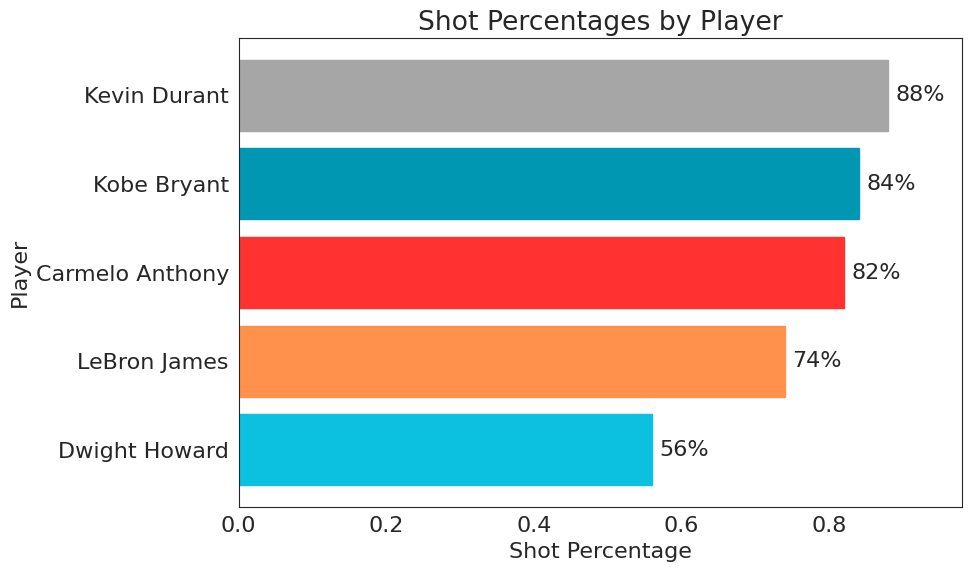

,Player,Shot %
4,Dwight Howard,0.56
0,LeBron James,0.74
3,Carmelo Anthony,0.82
2,Kobe Bryant,0.84
1,Kevin Durant,0.88


In [86]:
def percent_made(players):
    # Define color mapping for each player
    player_colors = {
        'LeBron James': '#ff914d',
        'Kevin Durant': '#a6a6a6',
        'Kobe Bryant': '#0097b2',
        'Carmelo Anthony': '#ff3131',
        'Dwight Howard': '#0cc0df'
    }

    percentages = []
    for player in players:
        player_data = original_data[original_data['player'] == player]
        percent = (player_data['shot_made'].sum() / len(player_data)).round(2)
        percentages.append(percent)

    # Create DataFrame and sort by Shot % in descending order
    df = pd.DataFrame({
        'Player': players,
        'Shot %': percentages
    }).sort_values('Shot %', ascending=True)

    # Create horizontal bar chart
    plt.figure(figsize=(10, 6))

    # Create bars with specific colors
    bars = plt.barh(range(len(df)), df['Shot %'])

    # Set the specific color for each bar based on player name
    for i, bar in enumerate(bars):
        player_name = df.iloc[i]['Player']
        bar.set_color(player_colors[player_name])

    # Set y-tick labels to player names
    plt.yticks(range(len(df)), df['Player'])

    # Customize the chart
    plt.title('Shot Percentages by Player')
    plt.xlabel('Shot Percentage')
    plt.ylabel('Player')

    # Add percentage labels on the bars with adjusted position
    for i, v in enumerate(df['Shot %']):
        plt.text(v + 0.01, i, f'{v:.0%}', va='center')

    # Adjust the x-axis limit to make room for labels
    plt.xlim(0, max(df['Shot %']) + 0.1)

    plt.tight_layout()
    plt.show()

    return df

# Call the function with the players list
percent_made(['LeBron James', 'Kevin Durant', 'Kobe Bryant', 'Carmelo Anthony', 'Dwight Howard'])

Compare avg final scores to avg free throws scored per each of the top 5 players in a game.

EX

LeBron makes on average 20 points a game from free throws, the average score for games is of about 100.

LeBron on average contributes 20% of the team's score in just free throws.

In [87]:
original_data.head()

,period,player,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,season_start,shot_count,minutes_elapsed
0,1,Andrew Bynum,0,1,LAL,PHX,1,0,114,106,47.000000,2006,1,1.000000
1,1,Andrew Bynum,0,1,LAL,PHX,2,0,114,106,47.000000,2006,2,1.000000
2,1,Andrew Bynum,0,1,LAL,PHX,12,18,114,106,29.733333,2006,1,18.266667
3,1,Andrew Bynum,0,0,LAL,PHX,12,18,114,106,29.733333,2006,2,18.266667
4,1,Shawn Marion,0,1,LAL,PHX,12,21,114,106,29.200000,2006,1,18.800000



Detailed Player Statistics:

Free Throw and Scoring Stats:
            player  avg_ft_made  ft_contribution_percentage  avg_game_score
0     LeBron James         6.03                        6.06           99.55
1     Kevin Durant         6.51                        6.54           99.55
2      Kobe Bryant         5.22                        5.25           99.55
3  Carmelo Anthony         9.82                        9.86           99.55
4    Dwight Howard         4.79                        4.81           99.55

Win/Loss Stats:
            player  total_games  wins  losses  win_rate  avg_score_differential
0     LeBron James          988   679     309      0.69                    5.38
1     Kevin Durant          813   464     349      0.57                    2.49
2      Kobe Bryant          900   483     417      0.54                    0.56
3  Carmelo Anthony          444   265     179      0.60                    3.35
4    Dwight Howard          899   538     361      0.60            

<ipython-input-88-6c98a90a7f48>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stats_df,
<ipython-input-88-6c98a90a7f48>:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
<ipython-input-88-6c98a90a7f48>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stats_df,
<ipython-input-88-6c98a90a7f48>:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


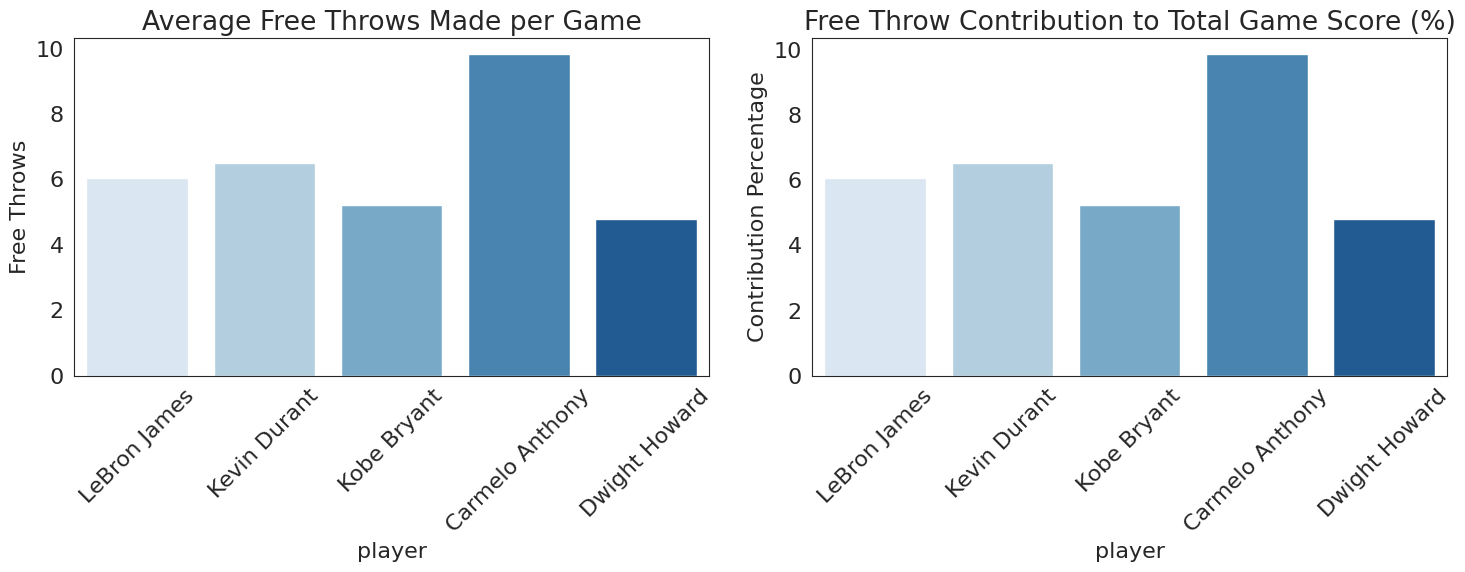

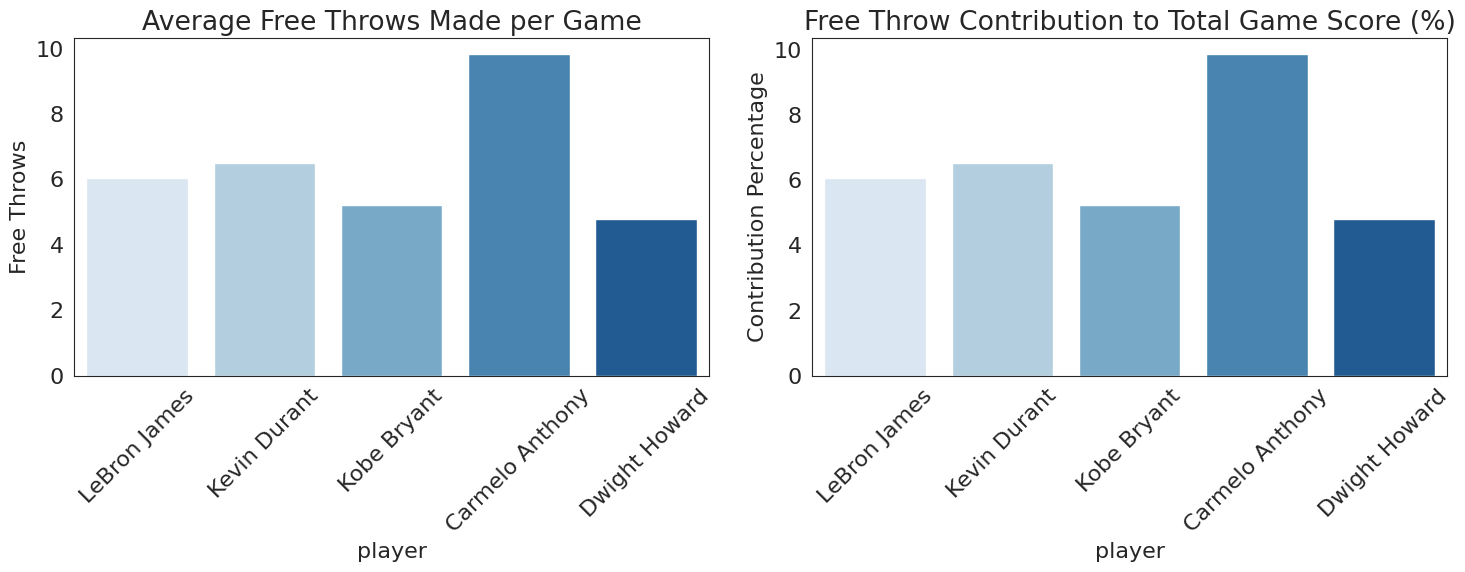

In [88]:
def analyze_scoring_contribution(data, players, player_team_mapping):
    # Create a copy of the data to avoid warnings
    df = data.copy()

    # Get unique games and calculate average game scores
    unique_games = df.drop_duplicates(subset=[
        'season_start', 'home_team', 'visit_team',
        'home_final_score', 'visit_final_score'
    ])

    # Calculate average game score
    avg_game_score = (unique_games['home_final_score'].mean() +
                     unique_games['visit_final_score'].mean()) / 2

    # Get win rates and score differentials from analyze_player_winrates
    player_stats, _ = analyze_player_winrates(data, player_team_mapping)
    win_stats = {row['player']: {
        'wins': row['wins'],
        'total_games': row['total_games'],
        'win_rate': row['win_rate'],
        'avg_score_diff': row['avg_score_diff']
    } for _, row in player_stats.iterrows()}

    results = []

    for player in players:
        # Get player's shots
        player_shots = df[df['player'] == player].copy()

        # Calculate made free throws
        made_ft = player_shots[player_shots['shot_made'] == 1]

        # Get unique games for this player
        player_games = player_shots.drop_duplicates(subset=[
            'season_start', 'home_team', 'visit_team',
            'home_final_score', 'visit_final_score'
        ]).copy()

        # Calculate free throw statistics
        total_games = win_stats[player]['total_games']  # Use total games from win_stats
        avg_ft_made = len(made_ft) / total_games
        ft_contribution = (avg_ft_made / avg_game_score) * 100

        results.append({
            'player': player,
            'avg_ft_made': round(avg_ft_made, 2),
            'avg_game_score': round(avg_game_score, 2),
            'ft_contribution_percentage': round(ft_contribution, 2),
            'total_games': win_stats[player]['total_games'],
            'wins': win_stats[player]['wins'],
            'losses': win_stats[player]['total_games'] - win_stats[player]['wins'],
            'win_rate': win_stats[player]['win_rate'],
            'avg_score_differential': win_stats[player]['avg_score_diff']
        })

    return pd.DataFrame(results)

def visualize_contributions(stats_df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot average free throws made
    sns.barplot(data=stats_df,
                x='player',
                y='avg_ft_made',
                ax=ax1,
                palette='Blues')
    ax1.set_title('Average Free Throws Made per Game')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.set_ylabel('Free Throws')

    # Plot contribution percentage
    sns.barplot(data=stats_df,
                x='player',
                y='ft_contribution_percentage',
                ax=ax2,
                palette='Blues')
    ax2.set_title('Free Throw Contribution to Total Game Score (%)')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    ax2.set_ylabel('Contribution Percentage')

    plt.tight_layout()
    plt.show()

    return fig

# List of players
players = ['LeBron James', 'Kevin Durant', 'Kobe Bryant', 'Carmelo Anthony', 'Dwight Howard']

# Run analysis
stats = analyze_scoring_contribution(original_data, players, get_player_team_mapping())

# Display detailed results
print("\nDetailed Player Statistics:")
print("\nFree Throw and Scoring Stats:")
print(stats[['player', 'avg_ft_made', 'ft_contribution_percentage', 'avg_game_score']].to_string())
print("\nWin/Loss Stats:")
print(stats[['player', 'total_games', 'wins', 'losses', 'win_rate', 'avg_score_differential']].to_string())

# Create visualization
visualize_contributions(stats)


Team Shooting Statistics:
team  total_shots  made_shots  shot_percentage
 DEN        45147       33872            0.750
 BOS        44416       33830            0.762
UTAH        44307       33466            0.755
  GS        43852       33343            0.760
 MIA        43661       32747            0.750


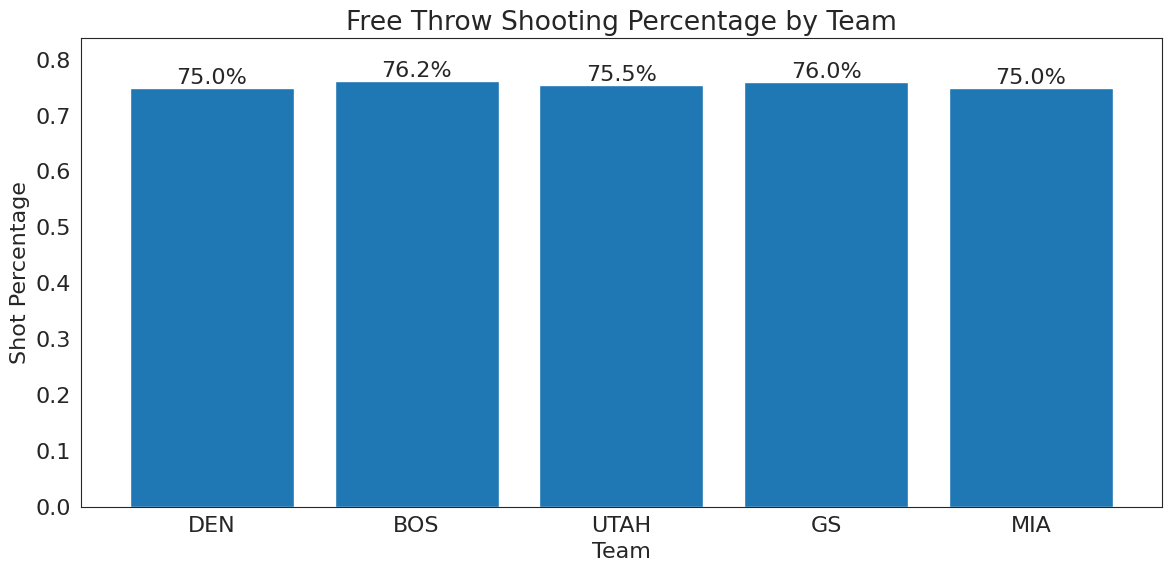

In [89]:
def analyze_team_shooting(data, teams):
    results = []

    for team in teams:
        # Get all games where the team played (either home or away)
        team_games = data[(data['home_team'] == team) | (data['visit_team'] == team)].copy()

        # Count total shots and made shots
        total_shots = len(team_games)
        made_shots = team_games['shot_made'].sum()

        # Calculate percentage
        shot_percentage = (made_shots / total_shots).round(3) if total_shots > 0 else 0

        results.append({
            'team': team,
            'total_shots': total_shots,
            'made_shots': made_shots,
            'shot_percentage': shot_percentage
        })

    # Convert to DataFrame and sort by total shots
    return pd.DataFrame(results).sort_values('total_shots', ascending=False)

# List of teams to analyze
teams = ['DEN', 'GS', 'BOS', 'UTAH', 'MIA']

# Run analysis
team_stats = analyze_team_shooting(original_data, teams)

# Display results
print("\nTeam Shooting Statistics:")
print(team_stats.to_string(index=False))

# Create visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(team_stats['team'], team_stats['shot_percentage'])

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1%}',
             ha='center', va='bottom')

plt.title('Free Throw Shooting Percentage by Team')
plt.xlabel('Team')
plt.ylabel('Shot Percentage')
plt.ylim(0, max(team_stats['shot_percentage']) * 1.1)  # Add 10% padding above bars

plt.tight_layout()
plt.show()

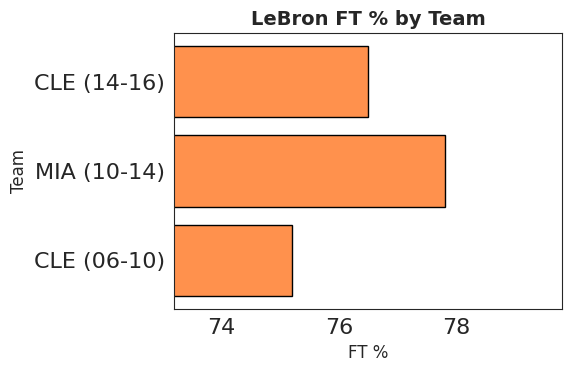

In [90]:
# Create DataFrame for LeBron's data
lebron_data = pd.DataFrame({
    'team_period': ["CLE (06-10)", "MIA (10-14)", "CLE (14-16)"],
    'ft_percentage': [75.2, 77.8, 76.5]
})

# Create horizontal bar chart with white background
plt.figure(figsize=(6, 4))
ax = plt.gca()
ax.set_facecolor('white')

plt.barh(lebron_data["team_period"],
         lebron_data["ft_percentage"],
         color="#ff914d",
         edgecolor="black")

# Labels and title
plt.xlabel("FT %", fontsize=12)
plt.ylabel("Team", fontsize=12)
plt.title("LeBron FT % by Team", fontsize=14, fontweight="bold")

# Adjust x-axis limits for better visualization
plt.xlim(min(lebron_data["ft_percentage"]) - 2, max(lebron_data["ft_percentage"]) + 2)

# Remove grid
ax.grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [91]:
# # Sort data by season order
# lebron_combined = lebron_combined.sort_values(by="team_period", ascending=True)

# # Create a horizontal bar chart for Wins only
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(8, 5))

# # Plot bars for Wins
# ax.barh(lebron_combined["team_period"], lebron_combined["wins"], color="blue", edgecolor="black", label="Wins")

# # Labels and formatting
# ax.set_xlabel("Total Wins", fontsize=12)
# ax.set_ylabel("Team Period", fontsize=12)
# ax.set_title("LeBron's Team Wins by Period", fontsize=14, fontweight="bold")

# # Add value labels on bars
# for i, v in enumerate(lebron_combined["wins"]):
#     ax.text(v + 5, i, str(v), va='center', fontsize=12, fontweight="bold")

# # Show plot
# plt.tight_layout()
# plt.show()

In [92]:
# # Data for Kevin Durant's free throw percentage (OKC period only)
# kd_teams = ["OKC (07-16)"]
# kd_ft_percentages = [kd_okc_ft_percentage]  # Ensure this variable contains the calculated FT %

# # Improve aesthetics and ensure correct orientation
# plt.figure(figsize=(6, 4))  # Adjust figure size for better proportions
# plt.barh(kd_teams, kd_ft_percentages, color="#ff914d", edgecolor="black")

# # Labels and title with improved formatting
# plt.ylabel("Team", fontsize=12)
# plt.xlabel("FT %", fontsize=12)
# plt.title("Durant FT % (OKC)", fontsize=14, fontweight="bold")
# plt.xlim(min(kd_ft_percentages) - 2, max(kd_ft_percentages) + 2)  # Add padding for better visuals

# # Display the plot
# plt.show()

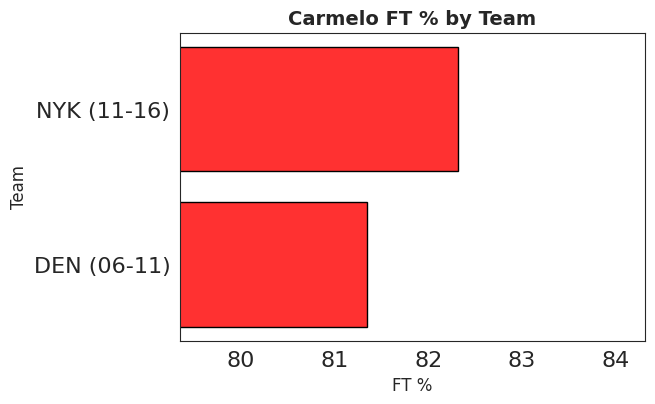

In [93]:
# Filter for Carmelo Anthony's free throws from 2006-2016
melo_df = original_data[(original_data["player"] == "Carmelo Anthony") & (original_data["season_start"] >= 2006) & (original_data["season_start"] <= 2016)]

# Group by season and calculate free throw percentage
melo_ft_stats = melo_df.groupby("season_start").agg(
    total_attempts=("shot_count", "count"),
    made_shots=("shot_made", "sum")
)

# Calculate free throw percentage
melo_ft_stats["ft_percentage"] = (melo_ft_stats["made_shots"] / melo_ft_stats["total_attempts"]) * 100

# Define team periods for Carmelo Anthony
melo_team_periods = {
    (2006, 2011): "DEN (06-11)",
    (2011, 2016): "NYK (11-16)",
}

# Assign team periods based on season range
melo_ft_stats["team_period"] = melo_ft_stats.index.map(
    lambda year: next((label for (start, end), label in melo_team_periods.items() if start <= year < end), "Other")
)

# Group by team period and calculate average free throw percentage
melo_ft_summary = melo_ft_stats.groupby("team_period")["ft_percentage"].mean().reset_index()

# Ensure correct order (Denver first)
team_order = ["DEN (06-11)", "NYK (11-16)"]
melo_ft_summary = melo_ft_summary.set_index("team_period").loc[team_order].reset_index()

# Create horizontal bar chart
plt.figure(figsize=(6, 4))
plt.barh(melo_ft_summary["team_period"], melo_ft_summary["ft_percentage"], color="#ff3131", edgecolor="black")

# Labels and title
plt.xlabel("FT %", fontsize=12)
plt.ylabel("Team", fontsize=12)
plt.title("Carmelo FT % by Team", fontsize=14, fontweight="bold")

# Adjust x-axis limits for better visualization
plt.xlim(min(melo_ft_summary["ft_percentage"]) - 2, max(melo_ft_summary["ft_percentage"]) + 2)

# Show plot
plt.show()

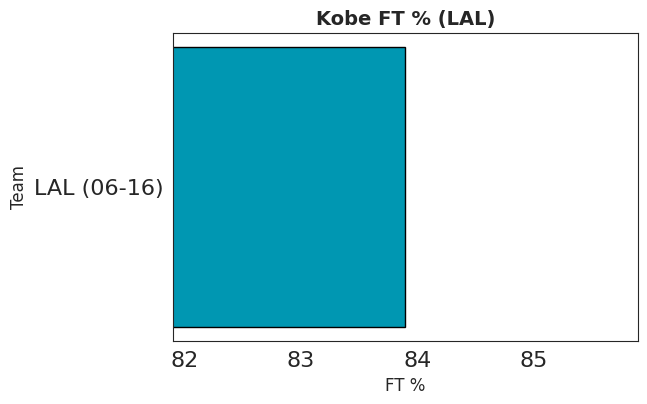

In [94]:
# Filter for Kobe Bryant's free throws from 2006-2016
kobe_df = original_data[(original_data["player"] == "Kobe Bryant") & (original_data["season_start"] >= 2006) & (original_data["season_start"] <= 2016)]

# Group by season and calculate free throw percentage
kobe_ft_stats = kobe_df.groupby("season_start").agg(
    total_attempts=("shot_count", "count"),
    made_shots=("shot_made", "sum")
)

# Calculate free throw percentage
kobe_ft_stats["ft_percentage"] = (kobe_ft_stats["made_shots"] / kobe_ft_stats["total_attempts"]) * 100

# Since Kobe only played for the Lakers, we'll just create a single team period
kobe_ft_summary = pd.DataFrame({
    "team_period": ["LAL (06-16)"],
    "ft_percentage": [kobe_ft_stats["ft_percentage"].mean()]  # Average across all seasons
})

# Create horizontal bar chart with specified color
plt.figure(figsize=(6, 4))
plt.barh(kobe_ft_summary["team_period"], kobe_ft_summary["ft_percentage"], color="#0097B2", edgecolor="black")

# Labels and title
plt.xlabel("FT %", fontsize=12)
plt.ylabel("Team", fontsize=12)
plt.title("Kobe FT % (LAL)", fontsize=14, fontweight="bold")

# Adjust x-axis limits for better visualization
plt.xlim(min(kobe_ft_summary["ft_percentage"]) - 2, max(kobe_ft_summary["ft_percentage"]) + 2)

# Show plot
plt.show()

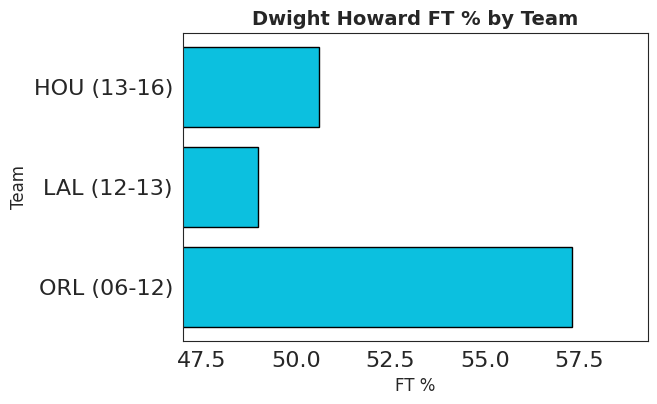

In [95]:
# Filter for Dwight Howard's free throws from 2006-2016
dwight_df = original_data[(original_data["player"] == "Dwight Howard") & (original_data["season_start"] >= 2006) & (original_data["season_start"] <= 2016)]

# Group by season and calculate free throw percentage
dwight_ft_stats = dwight_df.groupby("season_start").agg(
    total_attempts=("shot_count", "count"),
    made_shots=("shot_made", "sum")
)

# Calculate free throw percentage
dwight_ft_stats["ft_percentage"] = (dwight_ft_stats["made_shots"] / dwight_ft_stats["total_attempts"]) * 100

# Define team periods for Dwight Howard (2006-2016)
dwight_team_periods = {
    (2006, 2012): "ORL (06-12)",
    (2012, 2013): "LAL (12-13)",
    (2013, 2016): "HOU (13-16)",
}

# Assign team periods based on season range
dwight_ft_stats["team_period"] = dwight_ft_stats.index.map(
    lambda year: next((label for (start, end), label in dwight_team_periods.items() if start <= year < end), "Other")
)

# Group by team period and calculate average free throw percentage
dwight_ft_summary = dwight_ft_stats.groupby("team_period")["ft_percentage"].mean().reset_index()

# Ensure correct order
team_order = ["ORL (06-12)", "LAL (12-13)", "HOU (13-16)"]
dwight_ft_summary = dwight_ft_summary.set_index("team_period").loc[team_order].reset_index()

# Create horizontal bar chart with specified color
plt.figure(figsize=(6, 4))
plt.barh(dwight_ft_summary["team_period"], dwight_ft_summary["ft_percentage"], color="#0CC0DF", edgecolor="black")

# Labels and title
plt.xlabel("FT %", fontsize=12)
plt.ylabel("Team", fontsize=12)
plt.title("Dwight Howard FT % by Team", fontsize=14, fontweight="bold")

# Adjust x-axis limits for better visualization
plt.xlim(min(dwight_ft_summary["ft_percentage"]) - 2, max(dwight_ft_summary["ft_percentage"]) + 2)

# Show plot
plt.show()

Text(0.5, 1.0, 'Kevin Durant FT % (OKC)')

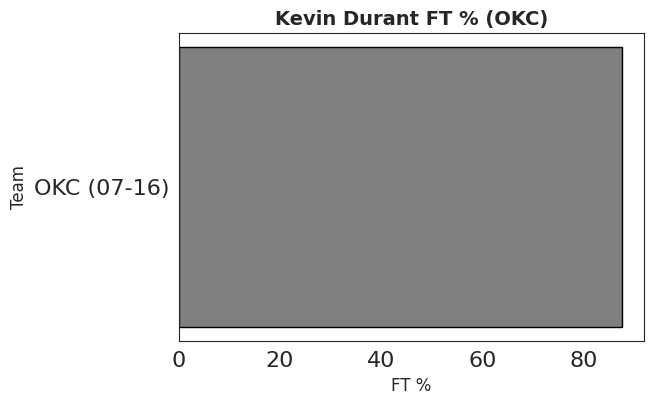

In [96]:
# Filter for Kevin Durant's free throws from 2006-2016
kd_df = original_data[(original_data["player"] == "Kevin Durant") & (original_data["season_start"] >= 2006) & (original_data["season_start"] <= 2016)]

# Group by season and calculate free throw percentage
kd_ft_stats = kd_df.groupby("season_start").agg(
    total_attempts=("shot_count", "count"),
    made_shots=("shot_made", "sum")
)

# Calculate free throw percentage
kd_ft_stats["ft_percentage"] = (kd_ft_stats["made_shots"] / kd_ft_stats["total_attempts"]) * 100

# Since Kevin Durant played only for OKC during this period, we categorize all seasons under OKC (07-16)
kd_ft_summary = pd.DataFrame({
    "team_period": ["OKC (07-16)"],
    "ft_percentage": [kd_ft_stats["ft_percentage"].mean()]  # Average across all seasons
})

# Create horizontal bar chart with gray color
plt.figure(figsize=(6, 4))
plt.barh(kd_ft_summary["team_period"], kd_ft_summary["ft_percentage"], color="gray", edgecolor="black")

# Labels and title
plt.xlabel("FT %", fontsize=12)
plt.ylabel("Team", fontsize=12)
plt.title("Kevin Durant FT % (OKC)", fontsize=14, fontweight="bold")

# Adjust x

Look at the player's performance home vs away - connect to teams by using time left

First slide based on time left get performance

Second Slide the same but separate home vs visitor

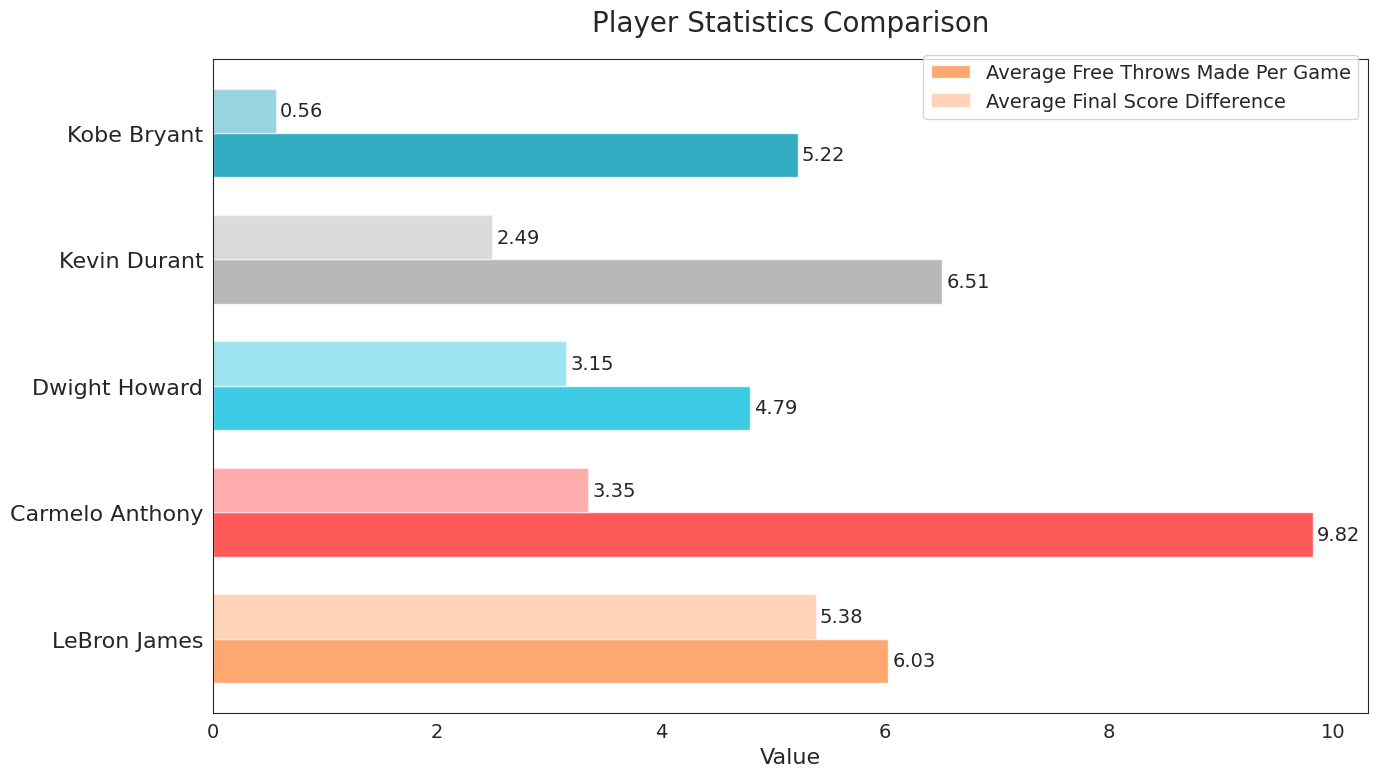

In [97]:
players = ['LeBron James', 'Carmelo Anthony', 'Dwight Howard', 'Kevin Durant', 'Kobe Bryant']
free_throws = [6.03, 9.82, 4.79, 6.51, 5.22]
score_diff = [5.38, 3.35, 3.15, 2.49, 0.56]

player_colors = {
    'LeBron James': '#ff914d',
    'Kevin Durant': '#a6a6a6',
    'Kobe Bryant': '#0097b2',
    'Carmelo Anthony': '#ff3131',
    'Dwight Howard': '#0cc0df'
}

plt.rcParams.update({'font.size': 14})  # Increase base font size

bar_colors = [player_colors[player] for player in players]

y = np.arange(len(players))
height = 0.35

fig, ax = plt.subplots(figsize=(14, 8))  # Increased figure size
ax.grid(False)  # Remove gridlines
rects1 = ax.barh(y - height/2, free_throws, height, label='Average Free Throws Made Per Game', color=bar_colors, alpha=0.8)
rects2 = ax.barh(y + height/2, score_diff, height, label='Average Final Score Difference', color=bar_colors, alpha=0.4)

ax.set_xlabel('Value', fontsize=16)
ax.set_title('Player Statistics Comparison', fontsize=20, pad=20)
ax.set_yticks(y)
ax.set_yticklabels(players, fontsize=16)
ax.legend(fontsize=14, bbox_to_anchor=(1, 1.02))

def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, rect.get_y() + rect.get_height()/2),
                    xytext=(3, 0),
                    textcoords="offset points",
                    ha='left', va='center',
                    fontsize=14)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

per minute basis fix

per game, check how many games the player's free throws "got them over the edge"

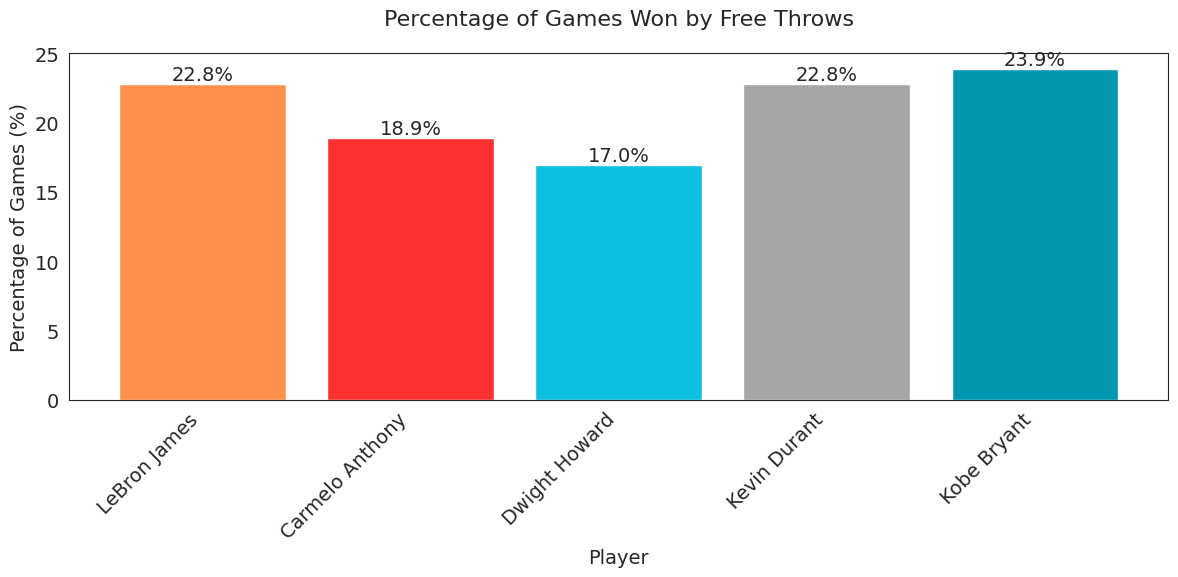


Impact Analysis Results:
         player  total_games  close_games  close_games_percentage  games_won_by_ft  ft_winning_percentage
   LeBron James          930          507                   54.52              212                  22.80
Carmelo Anthony          693          388                   55.99              131                  18.90
  Dwight Howard          802          450                   56.11              136                  16.96
   Kevin Durant          727          419                   57.63              166                  22.83
    Kobe Bryant          704          416                   59.09              168                  23.86


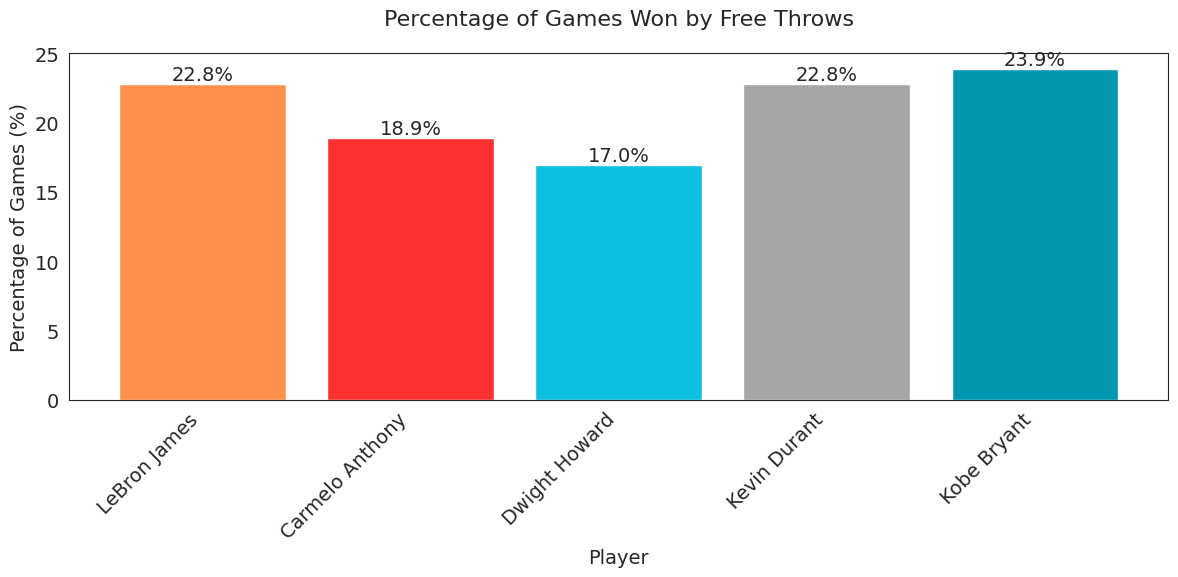

In [98]:
def analyze_game_winning_impact(data, players, team_mapping):
    df = data.copy()
    results = []

    for player in players:
        # Get player's team for each game based on season
        df.loc[df['player'] == player, 'player_team'] = df[df['player'] == player].apply(
            lambda x: team_mapping[player][x['season_start']], axis=1
        )

        # Get all games for this player
        player_games = df[df['player'] == player].groupby([
            'season_start', 'home_team', 'visit_team',
            'home_final_score', 'visit_final_score', 'player_team'
        ]).agg({
            'shot_made': 'sum'
        }).reset_index()

        winning_ft_games = 0
        close_games = 0

        for _, game in player_games.iterrows():
            ft_points = game['shot_made']
            player_team = game['player_team']

            # Determine if player's team was home or away
            is_home_team = game['home_team'] == player_team

            if is_home_team:
                score_diff = game['home_final_score'] - game['visit_final_score']
            else:
                score_diff = game['visit_final_score'] - game['home_final_score']

            # Count close games (margin ≤ 10 points)
            if abs(score_diff) <= 10:
                close_games += 1

            # Check if free throws were crucial for the win
            if 0 < score_diff <= ft_points:
                winning_ft_games += 1

        total_games = len(player_games)
        winning_ft_percentage = (winning_ft_games / total_games * 100) if total_games > 0 else 0
        close_games_percentage = (close_games / total_games * 100) if total_games > 0 else 0

        results.append({
            'player': player,
            'total_games': total_games,
            'close_games': close_games,
            'close_games_percentage': round(close_games_percentage, 2),
            'games_won_by_ft': winning_ft_games,
            'ft_winning_percentage': round(winning_ft_percentage, 2)
        })

    return pd.DataFrame(results)

def plot_ft_impact(impact_df):
    plt.figure(figsize=(12, 6))
    plt.grid(False)

    player_colors = {
        'LeBron James': '#ff914d',
        'Kevin Durant': '#a6a6a6',
        'Kobe Bryant': '#0097b2',
        'Carmelo Anthony': '#ff3131',
        'Dwight Howard': '#0cc0df'
    }

    colors = [player_colors[player] for player in impact_df['player']]

    bars = plt.bar(impact_df['player'], impact_df['ft_winning_percentage'], color=colors)
    plt.title('Percentage of Games Won by Free Throws', fontsize=16, pad=20)
    plt.xlabel('Player', fontsize=14)
    plt.ylabel('Percentage of Games (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')

    plt.tight_layout()
    return plt

impact_stats = analyze_game_winning_impact(original_data, players, get_player_team_mapping())
plt = plot_ft_impact(impact_stats)
plt.show()

# Run analysis
impact_stats = analyze_game_winning_impact(original_data, players, get_player_team_mapping())

# Display results
print("\nImpact Analysis Results:")
print(impact_stats.to_string(index=False))

# Create visualization
plt = plot_ft_impact(impact_stats)
plt.show()

In [99]:
def debug_game_winning_impact(data, players, team_mapping, num_games=10):
    df = data.copy()
    games_found = 0

    for player in players:
        df.loc[df['player'] == player, 'player_team'] = df[df['player'] == player].apply(
            lambda x: team_mapping[player][x['season_start']], axis=1
        )

        player_games = df[df['player'] == player].groupby([
            'season_start', 'home_team', 'visit_team',
            'home_final_score', 'visit_final_score', 'player_team'
        ]).agg({
            'shot_made': 'sum'
        }).reset_index()

        for _, game in player_games.iterrows():
            ft_points = game['shot_made']
            player_team = game['player_team']
            is_home_team = game['home_team'] == player_team

            if is_home_team:
                score_diff = game['home_final_score'] - game['visit_final_score']
            else:
                score_diff = game['visit_final_score'] - game['home_final_score']

            if 0 < score_diff <= ft_points:
                print(f"\nGame {games_found + 1} won by free throws:")
                print(f"Player: {player}")
                print(f"Season: {game['season_start']}")
                print(f"Teams: {game['home_team']} vs {game['visit_team']}")
                print(f"Score: {game['home_final_score']} - {game['visit_final_score']}")
                print(f"Player's team: {player_team} ({'home' if is_home_team else 'away'})")
                print(f"Free throws made: {ft_points}")
                print(f"Final score difference: {score_diff}")
                print("-" * 50)

                games_found += 1
                if games_found >= num_games:
                    return

debug_game_winning_impact(original_data, players, get_player_team_mapping())


Game 1 won by free throws:
Player: LeBron James
Season: 2006
Teams: BOS vs CLE
Score: 104 - 107
Player's team: CLE (away)
Free throws made: 8
Final score difference: 3
--------------------------------------------------

Game 2 won by free throws:
Player: LeBron James
Season: 2006
Teams: CHI vs CLE
Score: 108 - 112
Player's team: CLE (away)
Free throws made: 11
Final score difference: 4
--------------------------------------------------

Game 3 won by free throws:
Player: LeBron James
Season: 2006
Teams: CLE vs BOS
Score: 94 - 93
Player's team: CLE (home)
Free throws made: 19
Final score difference: 1
--------------------------------------------------

Game 4 won by free throws:
Player: LeBron James
Season: 2006
Teams: CLE vs CHA
Score: 104 - 101
Player's team: CLE (home)
Free throws made: 10
Final score difference: 3
--------------------------------------------------

Game 5 won by free throws:
Player: LeBron James
Season: 2006
Teams: CLE vs DET
Score: 88 - 82
Player's team: CLE (home

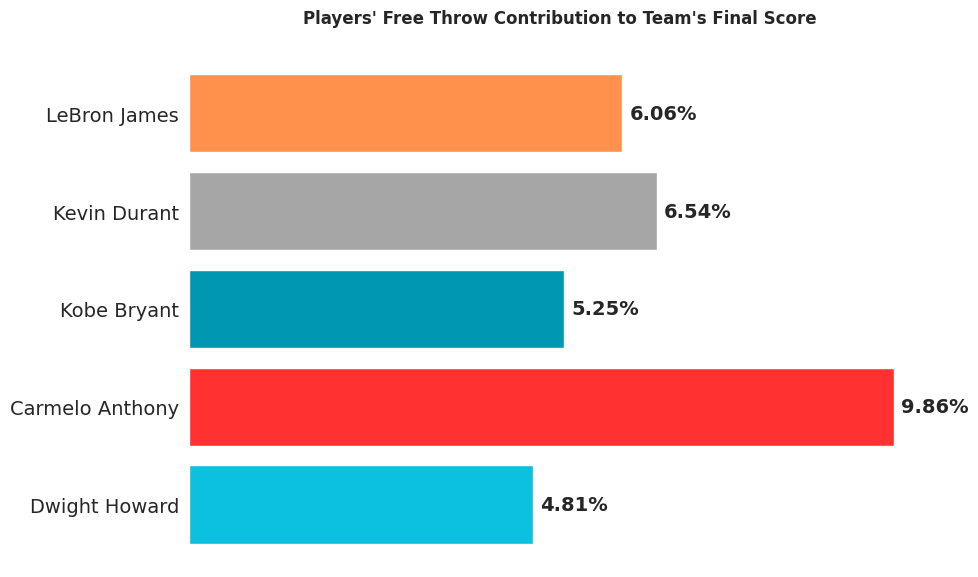

In [100]:
import matplotlib.pyplot as plt

# Data
players = ['LeBron James', 'Kevin Durant', 'Kobe Bryant', 'Carmelo Anthony', 'Dwight Howard']
contributions = [6.06, 6.54, 5.25, 9.86, 4.81]  # Updated contribution percentages
player_colors = {
    'LeBron James': '#FF914D',
    'Kevin Durant': '#A6A6A6',
    'Kobe Bryant': '#0097B2',
    'Carmelo Anthony': '#FF3131',
    'Dwight Howard': '#0CC0DF'
}

# Create colors list in the same order as players
colors = [player_colors[player] for player in players]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add title
plt.title("Players' Free Throw Contribution to Team's Final Score", pad=20, fontsize=12, fontweight='bold')

# Create horizontal bars
y_pos = range(len(players))
bars = ax.barh(y_pos, contributions, color=colors)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(players)
ax.invert_yaxis()  # Invert y-axis to show first player at top

# Remove grid
ax.grid(False)

# Hide x-axis and its labels
ax.set_xticks([])
ax.set_xlabel('')

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Add percentage labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    # Add a small offset (0.1) to the x position to create space between bar and text
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2,
            f'{width}%',
            va='center',
            ha='left',
            fontweight='bold')

# Adjust layout and add padding for the percentage labels
plt.tight_layout()
ax.set_xlim(0, max(contributions) + 0.5)  # Add extra space for labels

# Show plot
plt.show()